# Análise de vendas dos jogos da sétima geração de videogames
### Um estudo comparativo entre Xbox 360, Playstation 3 e Nintendo Wii com foco nos mercados norte-americano e japonês
<img src="../images/gen7.jpg" width="800" height="400">

# 1. Preparação e tratamento dos dados

## 1.1 Importação de módulos e bibliotecas

In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown


from src.utils import (
    remove_duplicates_per_platform,
    display_null,
    update_year_of_release,
    update_esrb_ratings,
    get_top_console_titles_by_year,
    get_console_releases_by_year,
    display_top_10_games, update_publisher,
    filter_and_print_top_exclusives,
    print_exclusives_by_platforms,
    print_exclusives_by_region, 
    display_top_10_games_by_platform,
    get_token, search_years_dict,
    get_esrb_ratings_igdb, convert_esrb_code
)

from src.visualization import (
    plot_global_market_share_pie_chart,
    plot_sales_by_platform_region,
    plot_region_market_share_pie_charts,
    plot_total_titles_by_platform,
    plot_games_per_platform_year,
    plot_regional_games,
    plot_total_sales_by_platform,
    plot_top_games_by_region,
    plot_top_games_by_console_and_region,
    plot_titles_by_genre,
    plot_top_genres_by_region,
    plot_market_share_by_genre,
    plot_top_titles_by_region,
    plot_top_genres_by_console_and_region,
    plot_top_rated_score,
    plot_top_exclusives_console_by_region,
    plot_genres_count_by_publishers_global,
    plot_sales_histograms, 
    plot_platform_sales_histograms,
    plot_top_publishers_by_region,
    plot_rating_distribution,
    plot_rating_distribution_by_platform,
    plot_sales_by_rating_per_region, 
    plot_sales_by_rating_per_platform
)

from src.constants import (
    font, region_info,
    gen5, gen6, gen7
)

plt.style.use('seaborn-v0_8-darkgrid')

## 1.2 Carregamento do dataset e lista de plataformas presentes

In [2]:
df_games = pd.read_csv("../data/Video_Games.csv")

In [3]:
platforms = df_games['platform'].unique()
print("Consoles presentes no dataset:")
print(platforms)

Consoles presentes no dataset:
['Wii' 'NES' 'GB' 'DS' 'PS3' 'PS2' 'SNES' 'X360' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


## 1.3 Criação de dataframes contendo as plataformas da 7ª, 6ª e 5ª geração

In [4]:
df_7th_gen = df_games[df_games['platform'].isin(gen7)]
df_6th_gen = df_games[df_games['platform'].isin(gen6)]
df_5th_gen = df_games[df_games['platform'].isin(gen5)]

In [5]:
df_7th_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3976 entries, 0 to 16925
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3976 non-null   object 
 1   platform         3976 non-null   object 
 2   year_of_release  3886 non-null   float64
 3   genre            3976 non-null   object 
 4   publisher        3969 non-null   object 
 5   na_sales         3976 non-null   float64
 6   eu_sales         3976 non-null   float64
 7   jp_sales         3976 non-null   float64
 8   other_sales      3976 non-null   float64
 9   global_sales     3976 non-null   float64
 10  critic_score     2370 non-null   float64
 11  critic_count     2370 non-null   float64
 12  user_score       2456 non-null   float64
 13  user_count       2456 non-null   float64
 14  developer        3099 non-null   object 
 15  rating           3064 non-null   object 
dtypes: float64(10), object(6)
memory usage: 528.1+ KB


## 1.4 Tratamento de títulos duplicados
Títulos duplicados são tratados como entradas distintas por plataforma, dado que muitos jogos possuem lançamentos multiplataforma.

In [6]:
df_7th_gen = remove_duplicates_per_platform(df_7th_gen, gen7)
df_6th_gen = remove_duplicates_per_platform(df_6th_gen, gen6)
df_5th_gen = remove_duplicates_per_platform(df_5th_gen, gen5)


Xbox 360:
  Linhas antes: 1279
  Duplicatas exatas removidas: 18
  Linhas depois: 1261
1 títulos ainda duplicados
    - Need for Speed: Most Wanted

Playstation 3:
  Linhas antes: 1359
  Duplicatas exatas removidas: 28
  Linhas depois: 1331
2 títulos ainda duplicados
    - Madden NFL 13
    - Sonic the Hedgehog

Nintendo Wii:
  Linhas antes: 1338
  Duplicatas exatas removidas: 17
  Linhas depois: 1321

Xbox:
  Linhas antes: 832
  Duplicatas exatas removidas: 8
  Linhas depois: 824

Playstation 2:
  Linhas antes: 2188
  Duplicatas exatas removidas: 27
  Linhas depois: 2161

Nintendo Gamecube:
  Linhas antes: 564
  Duplicatas exatas removidas: 8
  Linhas depois: 556

Sega Dreamcast:
  Linhas antes: 52
  Duplicatas exatas removidas: 0
  Linhas depois: 52

Playstation:
  Linhas antes: 1214
  Duplicatas exatas removidas: 17
  Linhas depois: 1197

Nintendo 64:
  Linhas antes: 325
  Duplicatas exatas removidas: 6
  Linhas depois: 319

Sega Saturn:
  Linhas antes: 175
  Duplicatas exatas remo

#### 1.4.1 Em relação a títulos duplicados, ainda existem duas questões a serem resolvidas nos títulos da sétima geração.

#### a) O caso 'Need for Speed: Most Wanted'
*Need for Speed: Most Wanted* de 2005 e *Need for Speed: Most Wanted* de 2012, são dois títulos distintos que compartilham o mesmo nome.

In [7]:
nfs_mw = df_7th_gen[df_7th_gen['title'] == 'Need for Speed: Most Wanted']
nfs_mw

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
147,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
190,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
1319,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN,NaN


#### Como ambas as versões foram lançadas para Xbox 360, irei tornar essa distinção explícita adicionando o ano de lançamento aos títulos.

In [8]:
nfs_mw_2005 = (df_7th_gen['title'] == 'Need for Speed: Most Wanted') & (df_7th_gen['year_of_release'] == 2005)
nfs_mw_2012 = (df_7th_gen['title'] == 'Need for Speed: Most Wanted') & (df_7th_gen['year_of_release'] == 2012)

df_7th_gen.loc[nfs_mw_2005, 'title'] = 'Need for Speed: Most Wanted (2005)'
df_7th_gen.loc[nfs_mw_2012, 'title'] = 'Need for Speed: Most Wanted (2012)'

In [9]:
df_7th_gen[(df_7th_gen['title'].str.contains('Need for Speed: Most Wanted', 
                                             case=False, na=False))]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
147,Need for Speed: Most Wanted (2012),X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
190,Need for Speed: Most Wanted (2005),X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
1319,Need for Speed: Most Wanted (2012),PS3,2012.0,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN,NaN


#### b) Títulos com registros duplicados decorrente da fragmentação das vendas regionais
Os títulos *Madden NFL 13* e *Sonic the Hedgehog* possuem registros duplicados na plataforma PS3, decorrente da fragmentação das vendas regionais.

In [10]:
ps3_dup_titles = ['Madden NFL 13', 'Sonic the Hedgehog']
df_ps3_dup_titles = df_7th_gen[(df_7th_gen['title'].isin(ps3_dup_titles)) & (df_7th_gen['platform'] == 'PS3')]
df_ps3_dup_titles.sort_values(by = 'title')

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1329,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.00,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
2568,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E
1458,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.06,0.04,0.66,1.16,43.0,17.0,4.1,176.0,Sonic Team,E10+
1753,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48,43.0,17.0,4.1,176.0,Sonic Team,E10+


#### 1.4.2 Títulos com registros duplicados, nos quais a separação das vendas por região está explicitada no próprio título, entre parênteses.
Exemplos:

In [11]:
df_7th_gen[(df_7th_gen['title'].str.contains('sales', 
                                             case=False, na=False))].head()

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
232,Winning Eleven: Pro Evolution Soccer 2007 (All...,X360,2006.0,Sports,Konami Digital Entertainment,0.08,0.90,0.02,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
671,SpongeBob's Truth or Square (US sales),X360,2009.0,Action,THQ,0.25,0.00,0.00,0.00,0.25,NaN,NaN,NaN,NaN,NaN,NaN
699,The Godfather (US & Others sales),X360,2006.0,Action,Electronic Arts,0.20,0.02,0.00,0.02,0.24,NaN,NaN,NaN,NaN,NaN,NaN
1011,Import Tuner Challenge (American sales),X360,2006.0,Racing,Ubisoft,0.07,0.01,0.00,0.01,0.09,NaN,NaN,NaN,NaN,NaN,NaN
1201,Enchanted Arms (JP sales),X360,2006.0,Role-Playing,Ubisoft,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_7th_gen[(df_7th_gen['title'].str.contains('Enchanted Arms', 
                                             case=False, na=False))]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
765,Enchanted Arms,X360,2006.0,Role-Playing,Ubisoft,0.16,0.02,0.00,0.02,0.19,69.0,54.0,6.9,60.0,From Software,T
1201,Enchanted Arms (JP sales),X360,2006.0,Role-Playing,Ubisoft,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2032,Enchanted Arms,PS3,2007.0,Role-Playing,Ubisoft,0.17,0.01,0.00,0.02,0.20,64.0,23.0,5.9,40.0,From Software,T
2448,Enchanted Arms (JP sales),PS3,2007.0,Role-Playing,Ubisoft,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.4.3 Resolução

Irei remover as informações entre parênteses, sempre que a palavra 'sales' for encontrada no título.

In [13]:
df_7th_gen['title'] = (
    df_7th_gen['title']
    .str.replace(
        r'\s*\((?=[^)]*sales)[^)]*\)$',
        '',
        regex=True
    )
)

Definindo as regras da agregação:

In [14]:
agg_rules = {
    'year_of_release': 'min',
    'genre': lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else None,
    'publisher': lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else None,
    'developer': lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else None,
    'rating': lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else None,

    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'critic_score': 'max',
    'critic_count': 'max',
    'user_score': 'max',
    'user_count': 'max'
}

df_7th_gen = (
    df_7th_gen
    .groupby(['title', 'platform'], as_index=False)
    .agg(agg_rules)
    .reindex(columns=df_7th_gen.columns)
)

In [15]:
# Corrige as vendas globais
df_7th_gen['global_sales'] = ( df_7th_gen['na_sales'] + df_7th_gen['eu_sales'] + df_7th_gen['jp_sales'] + df_7th_gen['other_sales'] )

In [16]:
df_7th_gen[(df_7th_gen['title'].isin(ps3_dup_titles)) & (df_7th_gen['platform'] == 'PS3')]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1816,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.23,2.57,83.0,22.0,5.5,101.0,EA Tiburon,E
2988,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.54,0.04,0.66,1.65,43.0,17.0,4.1,176.0,Sonic Team,E10+


In [17]:
df_7th_gen[(df_7th_gen['title'].str.contains('Enchanted Arms', 
                                             case=False, na=False))]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
959,Enchanted Arms,PS3,2007.0,Role-Playing,Ubisoft,0.17,0.01,0.04,0.02,0.24,64.0,23.0,5.9,40.0,From Software,T
960,Enchanted Arms,X360,2006.0,Role-Playing,Ubisoft,0.16,0.02,0.02,0.02,0.22,69.0,54.0,6.9,60.0,From Software,T


## 1.5 Tratamento de valores faltantes

In [18]:
display_null(df_7th_gen)

Valores nulos em: df_7th_gen

title 0
platform 0
year_of_release 86
genre 0
publisher 5
na_sales 0
eu_sales 0
jp_sales 0
other_sales 0
global_sales 0
critic_score 1578
critic_count 1578
user_score 1496
user_count 1496
developer 858
rating 893




### 1.5.1 Campo 'year_of_release'

### Identificação de valores ausentes

In [19]:
year_nan = df_7th_gen[df_7th_gen['year_of_release'].isna()]

### Atualização via API IGDB

In [20]:
year_of_release_null_titles = year_nan['title'].unique().tolist()
year_dict = search_years_dict(year_of_release_null_titles)

Buscando 70 títulos...

X   1/70: AKB1/48: Idol to Guam de Koish Não encontrado
X   2/70: Agarest Senki: Re-appearance   Não encontrado
O   3/70: Backbreaker                    2009
O   4/70: Battle vs. Chess               2007
O   5/70: Bejeweled 3                    2010
O   6/70: Big Beach Sports 2             2010
X   7/70: Brothers in Arms: Furious 4    Sem data
O   8/70: Build-A-Bear Workshop: Friends 2010
O   9/70: Call of Duty 3                 2006
O  10/70: Captain America: Super Soldier 2011
O  11/70: Combat Wings: The Great Battle 2012
X  12/70: Dance! It's Your Stage         1999 (fora de 2005-2016)
X  13/70: DanceDanceRevolution II        Não encontrado
O  14/70: Disney's Chicken Little: Ace I 2006
O  15/70: Ferrari: The Race Experience   2010
O  16/70: Flip's Twisted World           2010
O  17/70: Football Manager 2007          2006
O  18/70: Get Fit with Mel B             2010
X  19/70: Gun                            2021 (fora de 2005-2016)
O  20/70: Hakuouki: Shinseng

In [21]:
df_7th_gen['year_of_release'] = df_7th_gen['year_of_release'].astype('Int64')
update_year_of_release(df_7th_gen, year_dict)

Valores nulos restantes: 11


### Correção manual dos casos remanescentes

In [22]:
df_7th_gen[df_7th_gen['year_of_release'].isna()]['title'].unique().tolist()

['AKB1/48: Idol to Guam de Koishitara...',
 'Agarest Senki: Re-appearance',
 'Brothers in Arms: Furious 4',
 "Dance! It's Your Stage",
 'DanceDanceRevolution II',
 'Gun',
 'Mobile Ops: The One Year War',
 'Saint',
 'Singularity',
 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku']

In [23]:
year_mapping_gen7 = {
    'Singularity': 2010,
    'Gun': 2005,
    'Mobile Ops: The One Year War': 2008,
    'AKB1/48: Idol to Guam de Koishitara...': 2011,
    'Brothers in Arms: Furious 4': 2012,
    'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku': 2011,
    'Agarest Senki: Re-appearance': 2007,
    'DanceDanceRevolution II': 2011,
    'Saint': 2009,
    "Dance! It's Your Stage": 2010
}

update_year_of_release(df_7th_gen, year_mapping_gen7)

Valores nulos restantes: 0


### 1.5.2 Campo 'publisher'

### Identificação de valores ausentes

In [24]:
publisher_nan = df_7th_gen[df_7th_gen['publisher'].isna()]
list(publisher_nan['title'])

['AKB1/48: Idol to Guam de Koishitara...',
 'Brothers in Arms: Furious 4',
 'Monster Hunter Frontier Online',
 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku',
 'World of Tanks']

### Atualização manual

In [25]:
update_publisher(df_7th_gen, 'Monster Hunter Frontier Online', 'Capcom') 
update_publisher(df_7th_gen, 'World of Tanks', 'Wargaming') 
update_publisher(df_7th_gen, 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku', '07th Expansion') 
update_publisher(df_7th_gen, 'AKB1/48: Idol to Guam de Koishitara...', 'Illusion') 
update_publisher(df_7th_gen, 'Brothers in Arms: Furious 4', 'Gearbox Software')

In [26]:
df_7th_gen['publisher'].isnull().sum()

np.int64(0)

### 1.5.3 Campo 'rating'
### Recuperação via API IGDB

In [27]:
null_rating = df_7th_gen[df_7th_gen['rating'].isnull()]['title'].tolist()

In [28]:
esrb_dict = get_esrb_ratings_igdb(null_rating)

Buscando classificações ESRB para 893 títulos...

X   1/893: .hack: Sekai no Mukou ni + Ver Não encontrado
X   2/893: 101-in-1 Party Megamix Wii     Não encontrado
O   3/893: 11eyes: CrossOver              M
X   4/893: 2 in 1 Combo Pack: Sonic Heroe Não encontrado
X   5/893: 3rd Super Robot Wars Z Jigoku  Não encontrado
X   6/893: 3rd Super Robot Wars Z: Tengok Não encontrado
O   7/893: 428: Fuusa Sareta Shibuya de   M
O   8/893: 428: Fuusa Sareta Shibuya de   M
X   9/893: A.C.E.: Another Century's Epis Não encontrado
X  10/893: AKB1/149: Love Election        Não encontrado
X  11/893: AKB1/48: Idol to Guam de Koish Não encontrado
O  12/893: AMF Bowling Pinbusters!        E10+
X  13/893: Accel World: Ginyoku no Kakuse Sem ESRB
X  14/893: Accel World: Kasoku no Chouten Sem ESRB
O  15/893: Adventure Time: Explore the Du T
O  16/893: Adventure Time: Explore the Du T
O  17/893: Adventure Time: Finn & Jake In T
O  18/893: Adventure Time: Finn & Jake In T
O  19/893: Adventure Time: The Secret

In [29]:
update_esrb_ratings(df_7th_gen, esrb_dict)

Valores nulos restantes em 'rating': 443


Dos 443 títulos ainda sem classificação etária, muitos correspondem a jogos voltados ao mercado japonês, avaliados pelo sistema CERO e não pelo ESRB. Assim, esses títulos foram agrupados na categoria Not Rated.

In [30]:
jp_only = len(df_7th_gen[
    (df_7th_gen['rating'] == 'Not Rated') &
    (df_7th_gen['na_sales'] == 0) &
    (df_7th_gen['eu_sales'] == 0) &
    (df_7th_gen['other_sales'] == 0) &
    (df_7th_gen['jp_sales'] > 0)
])
print(f"Títulos sem classificação exclusivos do Japão:", jp_only)

Títulos sem classificação exclusivos do Japão: 0


In [31]:
na_only = len(df_7th_gen[
    (df_7th_gen['rating'] == 'Not Rated') &
    (df_7th_gen['na_sales'] > 0) &
    (df_7th_gen['eu_sales'] == 0) &
    (df_7th_gen['other_sales'] == 0) &
    (df_7th_gen['jp_sales'] == 0)
])

print(f"Títulos sem classificação exclusivos da América do Norte:", na_only)

Títulos sem classificação exclusivos da América do Norte: 0


In [32]:
df_7th_gen['rating'] = df_7th_gen['rating'].fillna('Not Rated')

## 1.6 Correções manuais de erros do dataset

### 1.6.1 Plataforma incorreta: 'Kinect Adventures!'

In [33]:
index_kinect_adventures = df_7th_gen[df_7th_gen['title'] == 'Kinect Adventures!'].index
df_7th_gen.loc[index_kinect_adventures, 'platform'] = 'X360'

df_7th_gen[df_7th_gen['title'] == 'Kinect Adventures!']

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1608,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.0,4.89,0.24,1.69,21.82,61.0,45.0,6.3,106.0,Good Science Studio,E


### 1.6.2 Gênero incorreto: 'FIFA Soccer 13' 
Corrigindo:

In [34]:
index_fifa_13 = df_7th_gen[df_7th_gen['title'] == 'FIFA Soccer 13'].index
df_7th_gen.loc[index_fifa_13, 'genre'] = 'Sports'

df_7th_gen[df_7th_gen['title'] == 'FIFA Soccer 13']

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1039,FIFA Soccer 13,PS3,2012,Sports,Electronic Arts,1.06,5.01,0.13,1.97,8.17,88.0,37.0,6.6,348.0,Electronic Arts,E
1040,FIFA Soccer 13,Wii,2012,Sports,Electronic Arts,0.18,0.44,0.00,0.07,0.69,NaN,NaN,1.6,21.0,Electronic Arts,E
1041,FIFA Soccer 13,X360,2012,Sports,Electronic Arts,1.09,3.47,0.03,0.57,5.16,90.0,48.0,6.1,403.0,Electronic Arts,E


## 1.7 Padronização e transformação de variáveis numéricas

### 1.7.1 Normalização da escala de 'critic_score'

In [35]:
df_7th_gen['critic_score'] = df_7th_gen['critic_score']/10

# 2. Análise
## 2.1 Contexto histórico

### 2.1.1 Vendas de jogos por plataforma e região (5ª geração)

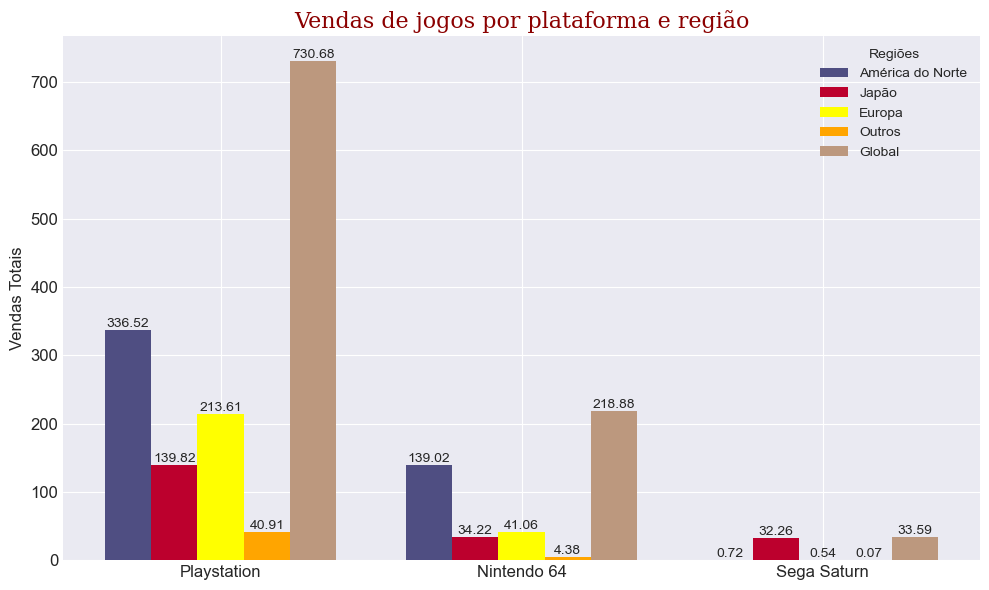

In [36]:
plot_sales_by_platform_region(df_5th_gen, region_info, gen5)

### 2.1.2 Vendas de jogos por plataforma e região (6ª geração)

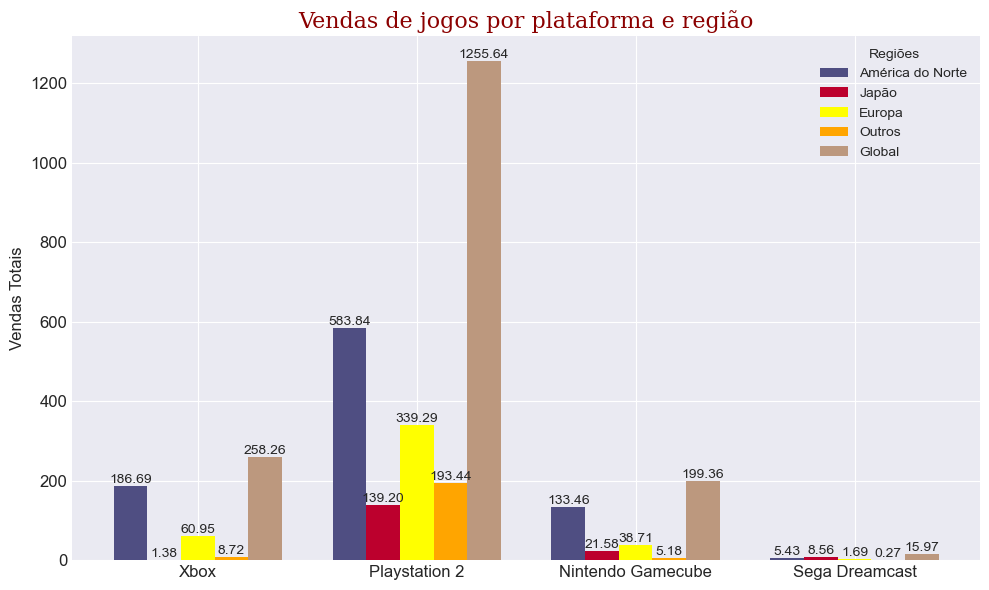

In [37]:
plot_sales_by_platform_region(df_6th_gen, region_info, gen6)

### 2.1.3 Vendas de jogos por plataforma e região (7ª geração)

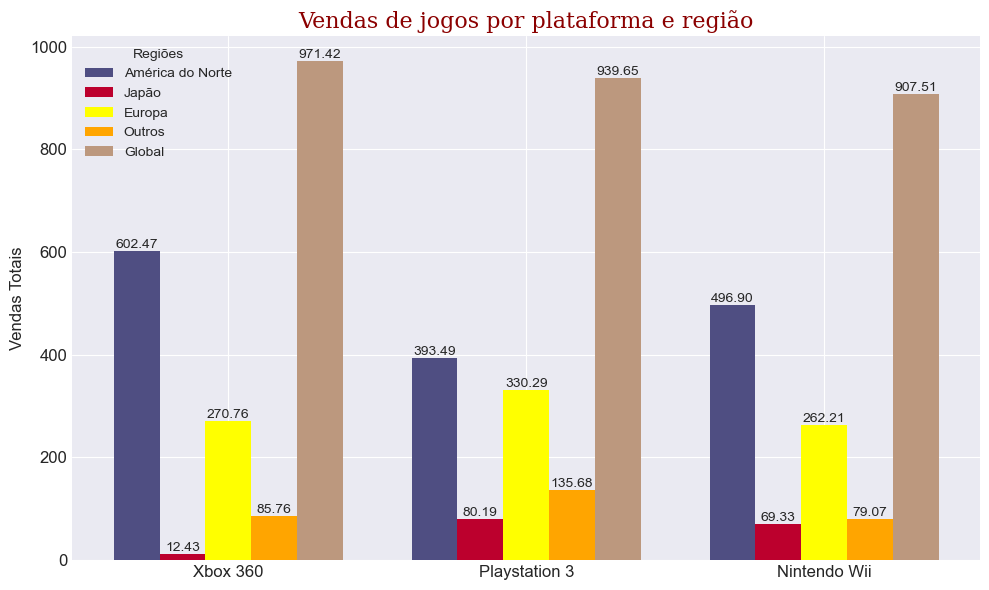

In [38]:
plot_sales_by_platform_region(df_7th_gen, region_info, gen7)

## 2.2 Breve panorama geral da 7ª geração de videogames

### 2.2.1 Quantos títulos foram lançados em cada plataforma?

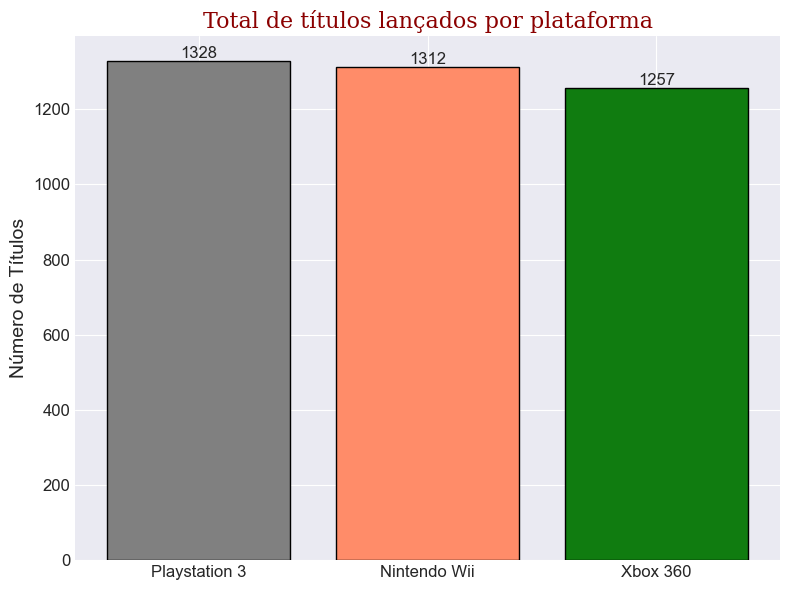

In [39]:
plot_total_titles_by_platform(df_7th_gen, gen7)

### 2.2.2 Quantos jogos cada plataforma recebeu anualmente?

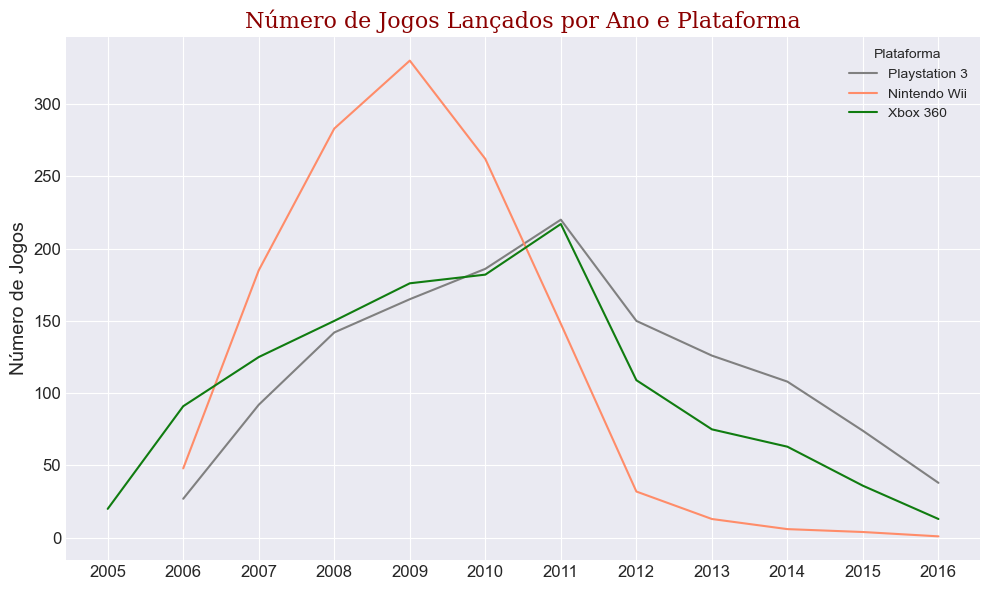

In [40]:
plot_games_per_platform_year(df_7th_gen, gen7)

### 2.2.3 Picos de lançamentos de títulos de cada plataforma

Como o dataset não possui informações de vendas anuais de cada título, utilizei 'global_sales' para retornar os principais títulos dos anos de pico.

In [41]:
print("Principais títulos de 2009 - Wii")
get_console_releases_by_year(df_7th_gen, 'Wii', 2009).head(10)

Principais títulos de 2009 - Wii


,title,genre,publisher,rating,global_sales,na_sales,jp_sales
1,Wii Sports Resort,Sports,Nintendo,E,32.77,15.61,3.28
2,New Super Mario Bros. Wii,Platform,Nintendo,E,28.32,14.44,4.70
3,Wii Fit Plus,Sports,Nintendo,E,21.80,9.01,2.53
4,Just Dance,Misc,Ubisoft,E10+,7.20,3.48,0.00
5,Mario & Sonic at the Olympic Winter Games,Sports,Sega,E10+,4.53,1.87,0.22
6,EA Sports Active,Sports,Electronic Arts,E,3.90,2.09,0.06
7,Monster Hunter Tri,Role-Playing,Nintendo,T,2.21,0.65,1.05
8,Your Shape featuring Jenny McCarthy,Sports,Ubisoft,E,2.13,1.49,0.00
9,Rock Band,Misc,MTV Games,T,2.09,1.33,0.00
10,Wipeout: The Game,Misc,Mindscape,E10+,2.06,1.94,0.00


In [42]:
print("Principais títulos de 2011 - Xbox 360")
get_console_releases_by_year(df_7th_gen, 'X360', 2011).head(10)

Principais títulos de 2011 - Xbox 360


,title,genre,publisher,rating,global_sales,na_sales,jp_sales
1,Call of Duty: Modern Warfare 3,Shooter,Activision,M,14.73,9.04,0.13
2,The Elder Scrolls V: Skyrim,Role-Playing,Bethesda Softworks,M,8.79,5.05,0.10
3,Battlefield 3,Shooter,Electronic Arts,M,7.32,4.46,0.06
4,Gears of War 3,Shooter,Microsoft Game Studios,M,6.21,4.05,0.07
5,Batman: Arkham City,Action,Warner Bros. Interactive Entertainment,T,4.72,2.99,0.04
6,Forza Motorsport 4,Racing,Microsoft Game Studios,E,4.57,2.08,0.06
7,Assassin's Creed: Revelations,Action,Ubisoft,M,4.19,2.25,0.04
8,FIFA 12,Sports,Electronic Arts,E10+,4.17,0.84,0.02
9,Saints Row: The Third,Action,THQ,M,2.76,1.25,0.07
10,L.A. Noire,Adventure,Take-Two Interactive,M,2.70,1.52,0.02


In [43]:
print("Principais títulos de 2011 - Playstation 3")
get_console_releases_by_year(df_7th_gen, 'PS3', 2011).head(10)

Principais títulos de 2011 - Playstation 3


,title,genre,publisher,rating,global_sales,na_sales,jp_sales
1,Call of Duty: Modern Warfare 3,Shooter,Activision,M,13.33,5.54,0.49
2,Battlefield 3,Shooter,Electronic Arts,M,7.17,2.85,0.35
3,Uncharted 3: Drake's Deception,Action,Sony Computer Entertainment,T,6.74,2.77,0.19
4,FIFA 12,Sports,Electronic Arts,E10+,6.64,0.84,0.11
5,The Elder Scrolls V: Skyrim,Role-Playing,Bethesda Softworks,M,6.40,2.55,0.25
6,Batman: Arkham City,Action,Warner Bros. Interactive Entertainment,T,5.48,2.71,0.11
7,Assassin's Creed: Revelations,Action,Ubisoft,M,4.22,1.41,0.10
8,LittleBigPlanet 2,Platform,Sony Computer Entertainment,E,3.40,1.83,0.06
9,L.A. Noire,Adventure,Take-Two Interactive,M,3.17,1.27,0.12
10,Mortal Kombat,Fighting,Warner Bros. Interactive Entertainment,M,2.85,1.98,0.00


### 2.2.4 Os primeiros anos de cada plataforma

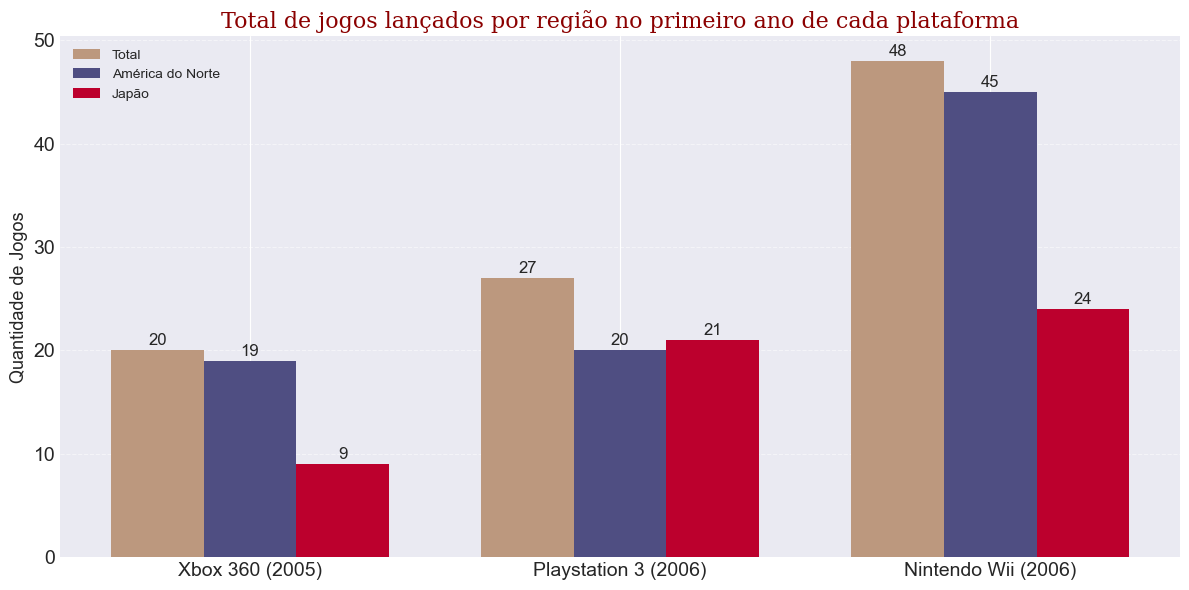

In [44]:
platforms_years = {'X360': 2005, 'PS3': 2006, 'Wii': 2006}
plot_regional_games(df_7th_gen, gen7, platforms_years)

### Xbox 360 (2005)

In [45]:
get_top_console_titles_by_year(df_7th_gen, 'X360', 2005).head()

,title,genre,year_of_release,rating,publisher,global_sales,na_sales,jp_sales,critic_score,user_score
1,Call of Duty 2,Shooter,2005,T,Activision,2.03,1.82,0.01,8.9,8.1
2,Need for Speed: Most Wanted (2005),Racing,2005,T,Electronic Arts,1.25,1.00,0.02,8.3,8.5
3,Perfect Dark Zero,Shooter,2005,M,Microsoft Game Studios,0.77,0.66,0.03,8.1,7.3
4,PGR3 - Project Gotham Racing 3,Racing,2005,T,Microsoft Game Studios,0.60,0.49,0.03,NaN,NaN
5,Madden NFL 06,Sports,2005,E,Electronic Arts,0.58,0.54,0.01,7.4,4.9


### Playstation 3 (2006)

In [46]:
print("* MotorStorm foi lançado na América do Norte apenas em 2007.")
get_top_console_titles_by_year(df_7th_gen, 'PS3', 2006).head(6)

* MotorStorm foi lançado na América do Norte apenas em 2007.


,title,genre,year_of_release,rating,publisher,global_sales,na_sales,jp_sales,critic_score,user_score
1,Resistance: Fall of Man,Shooter,2006,M,Sony Computer Entertainment,4.35,1.74,0.14,8.6,8.1
2,MotorStorm,Racing,2006,T,Sony Computer Entertainment,3.86,1.53,0.06,8.4,7.4
3,Fight Night Round 3,Fighting,2006,T,Electronic Arts,1.66,0.81,0.01,8.3,7.9
4,Sonic the Hedgehog,Platform,2006,E10+,Sega,1.65,0.41,0.04,4.3,4.1
5,Call of Duty 3,Shooter,2006,T,Activision,1.51,0.60,0.03,8.0,6.9
6,Ridge Racer 7,Racing,2006,E,Namco Bandai Games,1.36,0.24,0.16,7.8,7.1


### Xbox 360 (2006)

In [47]:
get_top_console_titles_by_year(df_7th_gen, 'X360', 2006).head()

,title,genre,year_of_release,rating,publisher,global_sales,na_sales,jp_sales,critic_score,user_score
1,Gears of War,Shooter,2006,M,Microsoft Game Studios,6.09,3.54,0.07,9.4,8.3
2,The Elder Scrolls IV: Oblivion,Role-Playing,2006,M,Take-Two Interactive,4.38,2.82,0.13,9.4,8.7
3,Call of Duty 3,Shooter,2006,T,Activision,2.70,1.49,0.02,8.2,6.5
4,Marvel: Ultimate Alliance,Role-Playing,2006,T,Activision,2.50,2.29,0.00,8.2,7.5
5,Saints Row,Action,2006,M,THQ,2.18,1.17,0.02,8.1,7.5


### Xbox 360 (2007)

In [48]:
get_top_console_titles_by_year(df_7th_gen, 'X360', 2007).head()

,title,genre,year_of_release,rating,publisher,global_sales,na_sales,jp_sales,critic_score,user_score
1,Halo 3,Shooter,2007,M,Microsoft Game Studios,12.12,7.97,0.13,9.4,7.8
2,Call of Duty 4: Modern Warfare,Shooter,2007,M,Activision,9.32,5.93,0.13,9.4,8.4
3,Assassin's Creed,Adventure,2007,M,Ubisoft,5.55,3.28,0.07,8.1,7.7
4,Guitar Hero III: Legends of Rock,Misc,2007,T,Activision,4.53,3.19,0.01,8.5,7.9
5,Forza Motorsport 2,Racing,2007,E,Microsoft Game Studios,4.06,2.35,0.03,9.0,8.3


### Playstation 3 (2007)

In [49]:
get_top_console_titles_by_year(df_7th_gen, 'PS3', 2007).head()

,title,genre,year_of_release,rating,publisher,global_sales,na_sales,jp_sales,critic_score,user_score
1,Call of Duty 4: Modern Warfare,Shooter,2007,M,Activision,6.68,3.11,0.28,9.4,8.4
2,Uncharted: Drake's Fortune,Action,2007,T,Sony Computer Entertainment,4.92,2.31,0.12,8.8,8.1
3,Assassin's Creed,Adventure,2007,M,Ubisoft,4.82,1.91,0.09,8.1,7.3
4,Gran Turismo 5 Prologue,Racing,2007,E,Sony Computer Entertainment,4.19,1.28,0.57,8.0,7.1
5,The Elder Scrolls IV: Oblivion,Role-Playing,2007,M,Ubisoft,3.11,1.69,0.14,9.3,8.0


### Wii (2006)

In [50]:
get_top_console_titles_by_year(df_7th_gen, 'Wii', 2006).head()

,title,genre,year_of_release,rating,publisher,global_sales,na_sales,jp_sales,critic_score,user_score
1,Wii Sports,Sports,2006,E,Nintendo,82.54,41.36,3.77,7.6,8.0
2,Wii Play,Misc,2006,E,Nintendo,28.91,13.96,2.93,5.8,6.6
3,The Legend of Zelda: Twilight Princess,Action,2006,T,Nintendo,7.16,3.74,0.60,9.5,9.0
4,WarioWare: Smooth Moves,Puzzle,2006,E10+,Nintendo,2.89,0.86,0.73,8.3,7.4
5,Super Monkey Ball: Banana Blitz,Misc,2006,E,Sega,2.24,1.05,0.04,7.4,5.7


### Wii (2007)

In [51]:
get_top_console_titles_by_year(df_7th_gen, 'Wii', 2007).head()

,title,genre,year_of_release,rating,publisher,global_sales,na_sales,jp_sales,critic_score,user_score
1,Wii Fit,Sports,2007,E,Nintendo,22.70,8.92,3.60,8.0,7.7
2,Super Mario Galaxy,Platform,2007,E,Nintendo,11.35,6.06,1.20,9.7,8.9
3,Mario Party 8,Misc,2007,E,Nintendo,8.26,3.74,1.58,6.2,6.3
4,Mario & Sonic at the Olympic Games,Sports,2007,E10+,Sega,8.00,2.57,0.66,NaN,NaN
5,LEGO Star Wars: The Complete Saga,Action,2007,E10+,LucasArts,5.63,3.57,0.00,8.0,8.9


## 2.2.5 Exclusividade temporária e perda de títulos multiplataforma
### 2.2.5.1 A exclusividade temporária do Xbox 360

In [52]:
df_7th_gen['year_of_release'] = df_7th_gen['year_of_release'].astype('Int64')

df_x360_ps3 = df_7th_gen[df_7th_gen['platform'].isin(['X360', 'PS3'])]

release_years = df_x360_ps3.pivot_table(
    index='title',
    columns='platform',
    values='year_of_release',
    aggfunc='min'
)

titles_x360_before = release_years[
    (release_years['X360'] < release_years['PS3'])
].copy()

x360_versions = df_7th_gen[
    (df_7th_gen['platform'] == 'X360') &
    (df_7th_gen['title'].isin(titles_x360_before.index))
].copy()

x360_versions['ps3_release_year'] = x360_versions['title'].map(titles_x360_before['PS3'])

x360_versions = x360_versions.rename(columns={
    'year_of_release': 'x360_release_year',
    'global_sales': 'x360_global_sales'
})

ps3_versions = df_7th_gen[
    (df_7th_gen['platform'] == 'PS3') &
    (df_7th_gen['title'].isin(titles_x360_before.index))
][['title', 'global_sales']].rename(columns={'global_sales': 'ps3_global_sales'})

x360_versions = x360_versions.merge(ps3_versions, on='title', how='left')

display(Markdown("### Jogos lançados primeiramente no Xbox 360 e depois no PS3"))
display(
    x360_versions[['title', 'x360_release_year', 'ps3_release_year', 
                   'x360_global_sales', 'ps3_global_sales']]
    .sort_values(by='x360_release_year')
    .style
    .format({'x360_global_sales': '{:.2f}', 'ps3_global_sales': '{:.2f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
)

### Jogos lançados primeiramente no Xbox 360 e depois no PS3

title,x360_release_year,ps3_release_year,x360_global_sales,ps3_global_sales
College Hoops 2K7,2006,2007,0.22,0.17
Enchanted Arms,2006,2007,0.22,0.24
F.E.A.R.,2006,2007,0.34,0.54
Lost Planet: Extreme Condition,2006,2008,1.33,0.63
Samurai Warriors 2,2006,2013,0.09,0.03
Tom Clancy's Rainbow Six: Vegas,2006,2007,1.96,1.25
Tom Clancy's Splinter Cell: Double Agent,2006,2007,0.78,0.26
The Elder Scrolls IV: Oblivion,2006,2007,4.38,3.11
The History Channel: Battle for the Pacific,2007,2008,0.05,0.08
BioShock,2007,2008,2.83,1.42


### 2.2.5.2 Nintendo Wii - Desafios técnicos e perda de títulos multiplataforma
A menor capacidade técnica do Wii limitou sua presença em títulos multiplataforma.

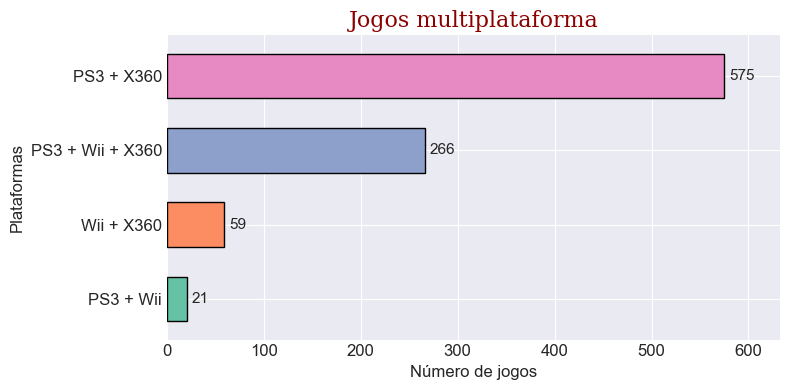

In [53]:
platform_combinations = (
    df_7th_gen.groupby('title')['platform']
    .apply(lambda x: tuple(sorted(x.unique())))
    .value_counts()
    .reset_index(name='count')
)

platform_combinations = platform_combinations[
    platform_combinations['platform'].apply(lambda x: len(x) > 1)
]
platform_combinations['platform'] = platform_combinations['platform'].apply(lambda x: " + ".join(x))
platform_combinations_sorted = platform_combinations.sort_values('count', ascending=True)

colors = plt.cm.Set2.colors

ax = platform_combinations_sorted.plot.barh(
    x='platform', 
    y='count', 
    figsize=(8, 4), 
    color=colors,
    edgecolor='black',
    fontsize=12,
    legend=False,
    width=0.6
)

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 5, y, str(int(width)), fontsize=11, va='center')

ax.set_xlim(0, platform_combinations_sorted['count'].max() * 1.1)

plt.xlabel("Número de jogos", fontsize=12)
plt.ylabel("Plataformas", fontsize=12)
plt.title("Jogos multiplataforma", fontdict=font, fontsize=16)
plt.tight_layout()
plt.show()

## 2.3 Análise comparativa entre os mercados norte-americano e japonês da 7ª geração de videogames

### 2.3.1 Participação de mercado

### Participação global

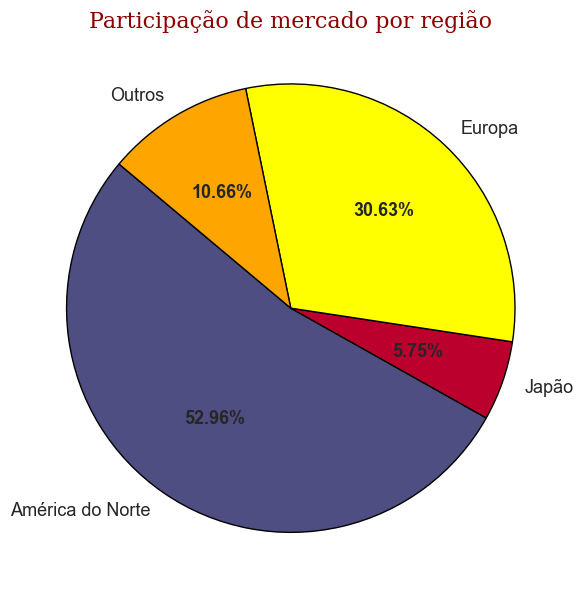

In [54]:
plot_global_market_share_pie_chart(df_7th_gen)

### Participação por plataforma e região

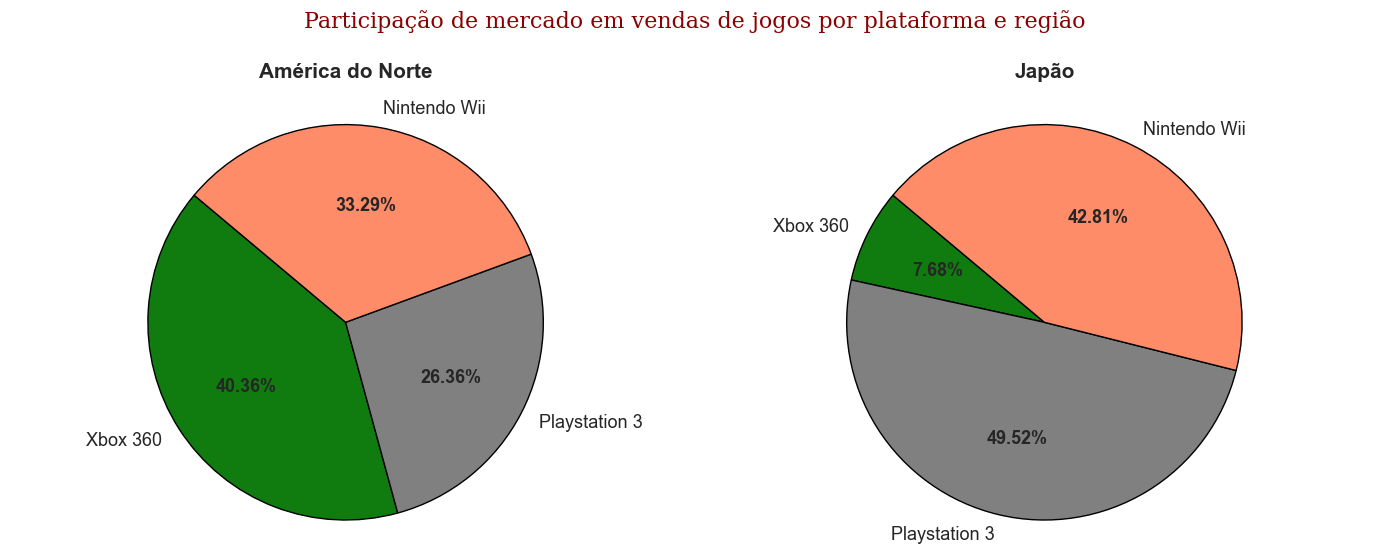

In [55]:
selected_regions = list(region_info.keys())[:2]
plot_region_market_share_pie_charts(df_7th_gen, gen7, selected_regions)

### 2.3.2 Distribuição de vendas

### Distribuição de vendas por região

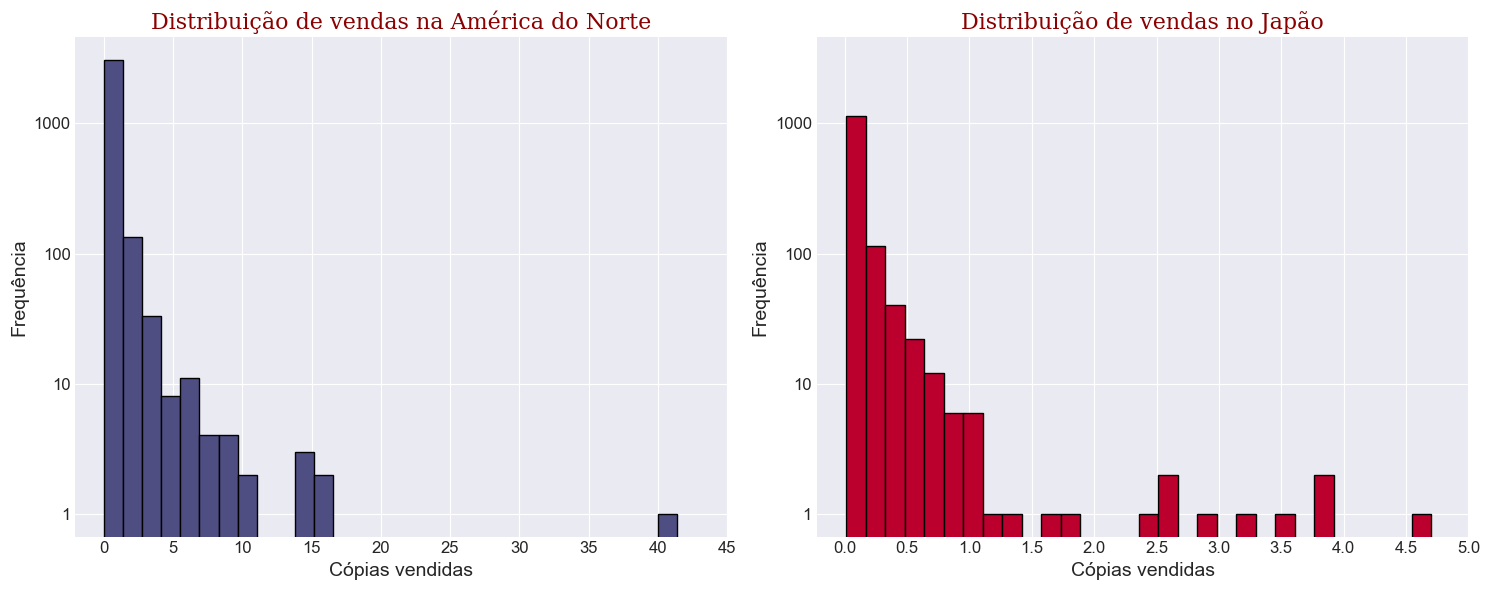

In [56]:
plot_sales_histograms(df_7th_gen, selected_regions)

### Distribuição de vendas por região e plataforma

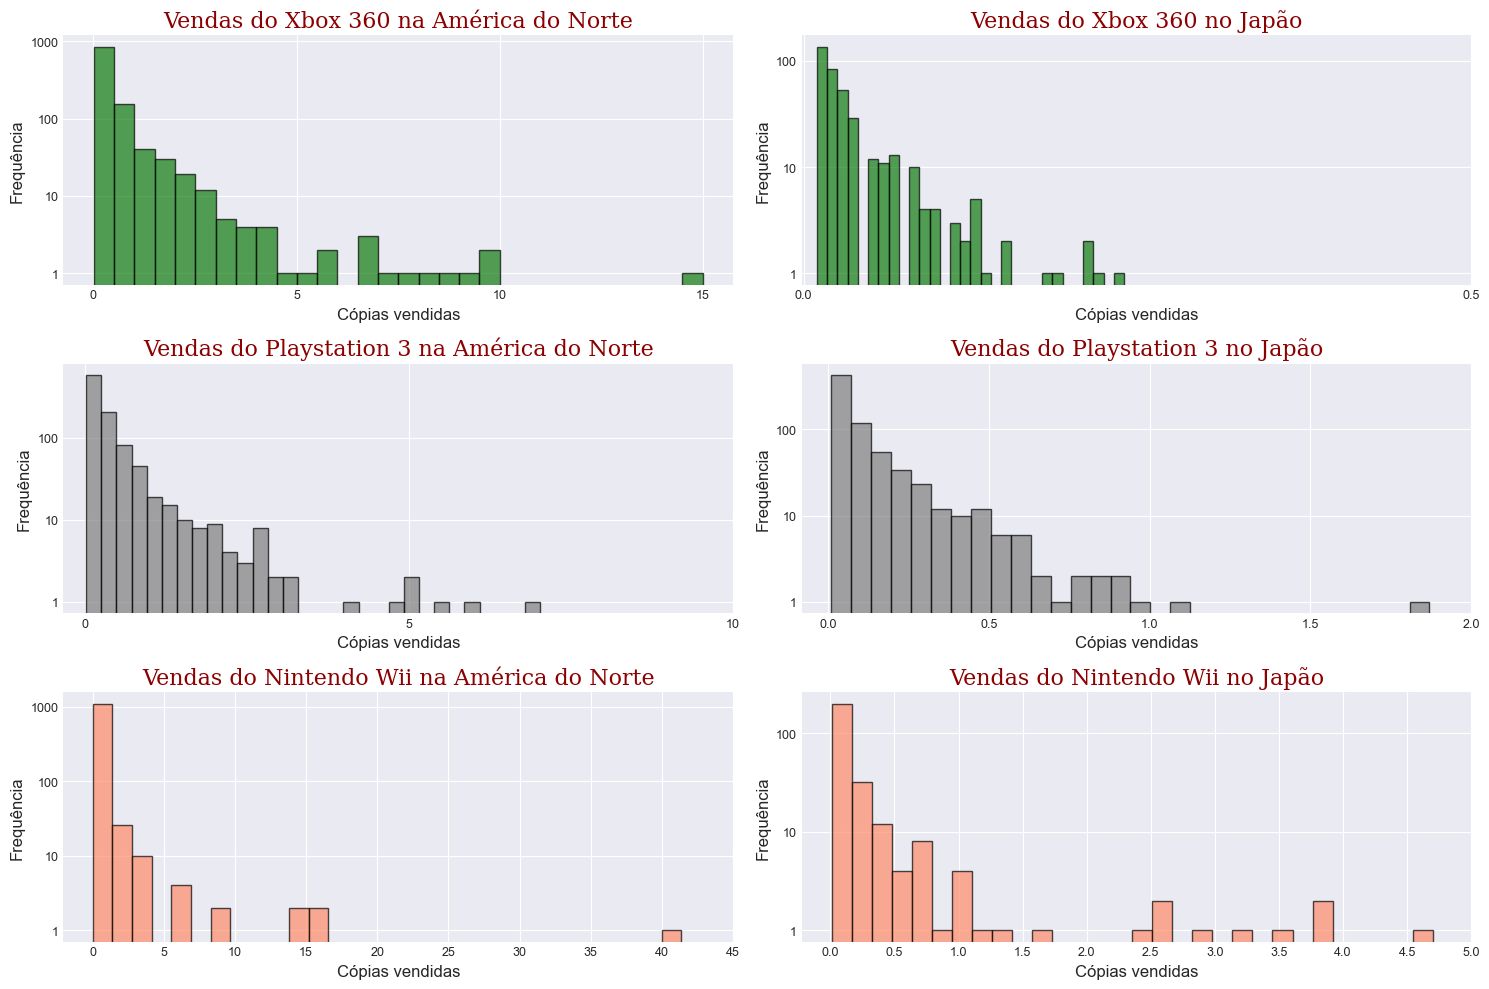

In [57]:
plot_platform_sales_histograms(df_7th_gen, gen7, selected_regions)

### 2.3.3 Análise de outliers de vendas
Títulos excepcionalmente dominantes em cada mercado

### América do Norte

In [58]:
df_7th_gen[df_7th_gen['na_sales'] > 40]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
3746,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,7.6,51.0,8.0,322.0,Nintendo,E


<img src="../images/wii_sports.jpg" width="20%">

### Japão

In [59]:
df_7th_gen[df_7th_gen['jp_sales'] > 4]

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
2299,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.7,2.24,28.32,8.7,80.0,8.4,594.0,Nintendo,E


<img src="../images/sm_wii_jp.png" width="20%">

### 2.3.4 Jogos mais vendidos por região

### América do Norte

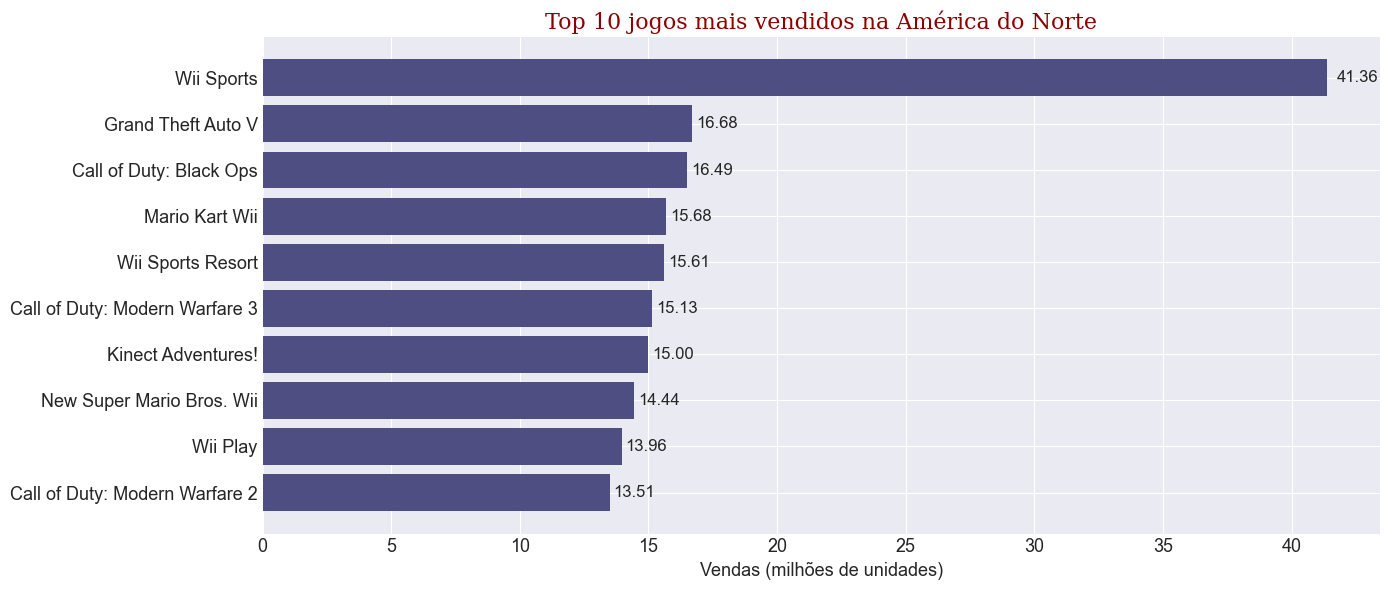

In [60]:
plot_top_games_by_region(df_7th_gen, 'na_sales')

### Japão

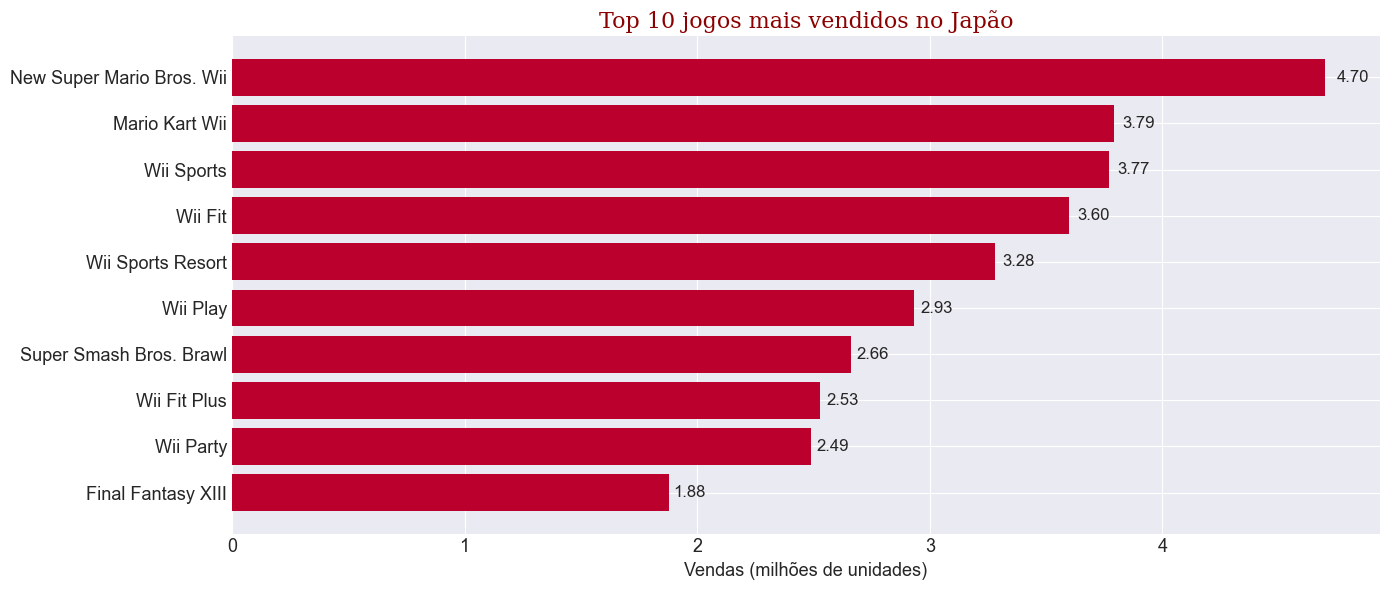

In [61]:
plot_top_games_by_region(df_7th_gen, 'jp_sales')

In [62]:
df_7th_gen[df_7th_gen['title'] == 'Call of Duty: Modern Warfare 3']

,title,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
474,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.73,0.49,1.57,13.33,8.8,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M
475,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,0.55,0.20,0.00,0.08,0.83,7.0,16.0,1.8,442.0,"Treyarch, Sledgehammer Games",M
476,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,8.8,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M


In [63]:
display_top_10_games(df_7th_gen, selected_regions)


Top 10 jogos mais vendidos da 7ª geração na América do Norte:



,title,na_sales,publisher,developer,genre,rating
1,Wii Sports,41.36,Nintendo,Nintendo,Sports,E
2,Grand Theft Auto V,16.68,Take-Two Interactive,Rockstar North,Action,M
3,Call of Duty: Black Ops,16.49,Activision,Treyarch,Shooter,M
4,Mario Kart Wii,15.68,Nintendo,Nintendo,Racing,E
5,Wii Sports Resort,15.61,Nintendo,Nintendo,Sports,E
6,Call of Duty: Modern Warfare 3,15.13,Activision,"Infinity Ward, Sledgehammer Games",Shooter,M
7,Kinect Adventures!,15.00,Microsoft Game Studios,Good Science Studio,Misc,E
8,New Super Mario Bros. Wii,14.44,Nintendo,Nintendo,Platform,E
9,Wii Play,13.96,Nintendo,Nintendo,Misc,E
10,Call of Duty: Modern Warfare 2,13.51,Activision,Infinity Ward,Shooter,M



Top 10 jogos mais vendidos da 7ª geração no Japão:



,title,jp_sales,publisher,developer,genre,rating
1,New Super Mario Bros. Wii,4.70,Nintendo,Nintendo,Platform,E
2,Mario Kart Wii,3.79,Nintendo,Nintendo,Racing,E
3,Wii Sports,3.77,Nintendo,Nintendo,Sports,E
4,Wii Fit,3.60,Nintendo,Nintendo,Sports,E
5,Wii Sports Resort,3.28,Nintendo,Nintendo,Sports,E
6,Wii Play,2.93,Nintendo,Nintendo,Misc,E
7,Super Smash Bros. Brawl,2.66,Nintendo,Game Arts,Fighting,T
8,Wii Fit Plus,2.53,Nintendo,Nintendo,Sports,E
9,Wii Party,2.49,Nintendo,Nd Cube,Misc,E
10,Final Fantasy XIII,1.88,Square Enix,Square Enix,Role-Playing,T


## 2.3.5 Jogos mais vendidos por plataforma e região

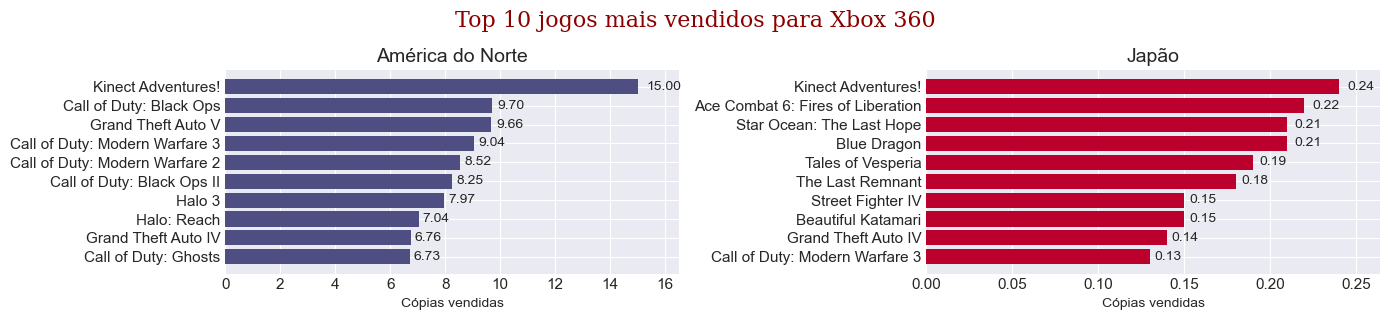

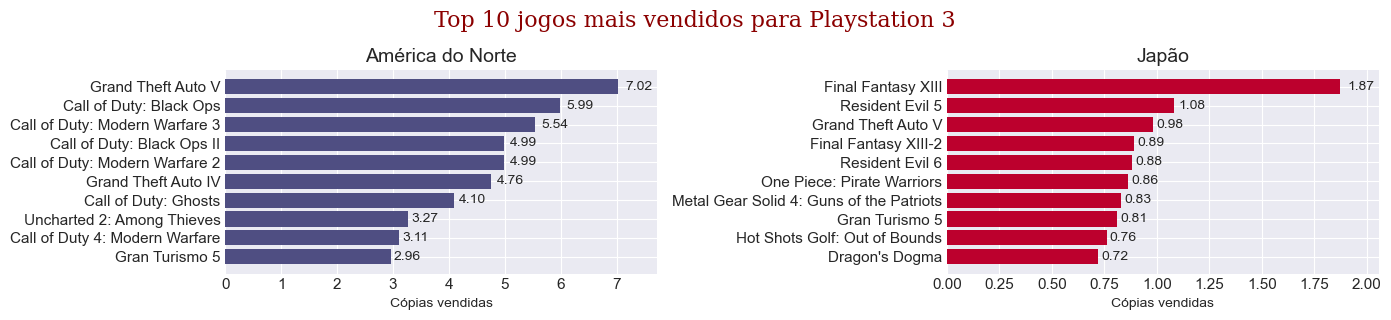

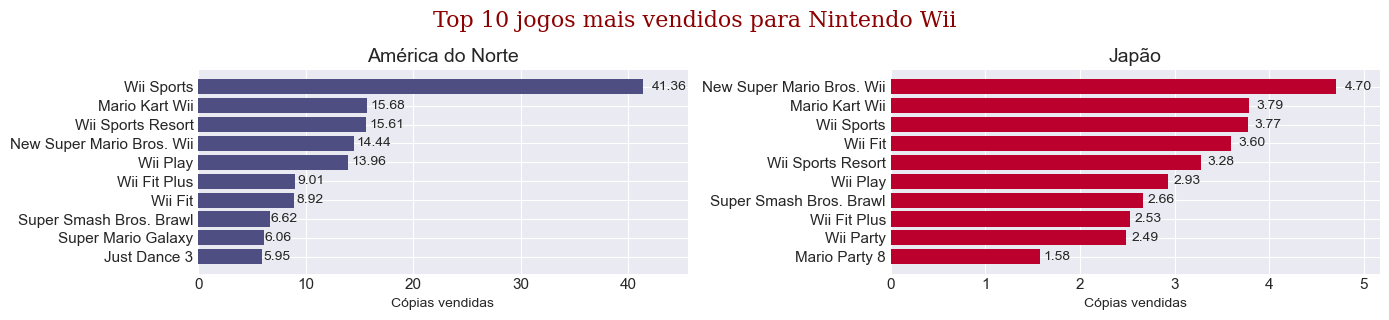

In [64]:
plot_top_games_by_console_and_region(df_7th_gen, platforms, selected_regions, gen7, region_info)

In [65]:
display_top_10_games_by_platform(df_7th_gen, gen7, selected_regions)


Top 10 jogos mais vendidos para Xbox 360 na América do Norte:



,title,na_sales,publisher,developer,genre,rating,critic_score,user_score
1,Kinect Adventures!,15.00,Microsoft Game Studios,Good Science Studio,Misc,E,6.1,6.3
2,Call of Duty: Black Ops,9.70,Activision,Treyarch,Shooter,M,8.7,6.3
3,Grand Theft Auto V,9.66,Take-Two Interactive,Rockstar North,Action,M,9.7,8.1
4,Call of Duty: Modern Warfare 3,9.04,Activision,"Infinity Ward, Sledgehammer Games",Shooter,M,8.8,3.4
5,Call of Duty: Modern Warfare 2,8.52,Activision,Infinity Ward,Shooter,M,9.4,6.3
6,Call of Duty: Black Ops II,8.25,Activision,Treyarch,Shooter,M,8.3,4.8
7,Halo 3,7.97,Microsoft Game Studios,"Bungie Software, Bungie",Shooter,M,9.4,7.8
8,Halo: Reach,7.04,Microsoft Game Studios,Bungie,Shooter,M,9.1,7.9
9,Grand Theft Auto IV,6.76,Take-Two Interactive,Rockstar North,Action,M,9.8,7.9
10,Call of Duty: Ghosts,6.73,Activision,Infinity Ward,Shooter,M,7.3,2.6



Top 10 jogos mais vendidos para Xbox 360 no Japão:



,title,jp_sales,publisher,developer,genre,rating,critic_score,user_score
1,Kinect Adventures!,0.24,Microsoft Game Studios,Good Science Studio,Misc,E,6.1,6.3
2,Ace Combat 6: Fires of Liberation,0.22,Atari,Project Aces,Simulation,T,8.0,7.9
3,Star Ocean: The Last Hope,0.21,Square Enix,"Square Enix, Tri-Ace",Role-Playing,T,7.2,7.2
4,Blue Dragon,0.21,Microsoft Game Studios,"Mistwalker, Artoon",Role-Playing,T,7.9,7.8
5,Tales of Vesperia,0.19,Atari,Bandai Namco Games,Role-Playing,M,7.9,8.2
6,The Last Remnant,0.18,Square Enix,Square Enix,Role-Playing,M,6.6,6.9
7,Street Fighter IV,0.15,Capcom,Capcom,Fighting,T,9.3,7.3
8,Beautiful Katamari,0.15,Namco Bandai Games,Now Production,Puzzle,E,7.3,7.0
9,Grand Theft Auto IV,0.14,Take-Two Interactive,Rockstar North,Action,M,9.8,7.9
10,Call of Duty: Modern Warfare 3,0.13,Activision,"Infinity Ward, Sledgehammer Games",Shooter,M,8.8,3.4



Top 10 jogos mais vendidos para Playstation 3 na América do Norte:



,title,na_sales,publisher,developer,genre,rating,critic_score,user_score
1,Grand Theft Auto V,7.02,Take-Two Interactive,Rockstar North,Action,M,9.7,8.2
2,Call of Duty: Black Ops,5.99,Activision,Treyarch,Shooter,M,8.8,6.4
3,Call of Duty: Modern Warfare 3,5.54,Activision,"Infinity Ward, Sledgehammer Games",Shooter,M,8.8,3.2
4,Call of Duty: Black Ops II,4.99,Activision,Treyarch,Shooter,M,8.3,5.3
5,Call of Duty: Modern Warfare 2,4.99,Activision,Infinity Ward,Shooter,M,9.4,6.3
6,Grand Theft Auto IV,4.76,Take-Two Interactive,Rockstar North,Action,M,9.8,7.5
7,Call of Duty: Ghosts,4.10,Activision,Infinity Ward,Shooter,M,7.1,2.6
8,Uncharted 2: Among Thieves,3.27,Sony Computer Entertainment,Naughty Dog,Action,T,9.6,8.8
9,Call of Duty 4: Modern Warfare,3.11,Activision,Infinity Ward,Shooter,M,9.4,8.4
10,Gran Turismo 5,2.96,Sony Computer Entertainment,Polyphony Digital,Racing,E,8.4,7.5



Top 10 jogos mais vendidos para Playstation 3 no Japão:



,title,jp_sales,publisher,developer,genre,rating,critic_score,user_score
1,Final Fantasy XIII,1.87,Square Enix,Square Enix,Role-Playing,T,8.3,7.3
2,Resident Evil 5,1.08,Capcom,Capcom,Action,M,8.4,7.5
3,Grand Theft Auto V,0.98,Take-Two Interactive,Rockstar North,Action,M,9.7,8.2
4,Final Fantasy XIII-2,0.89,Square Enix,Square Enix,Role-Playing,T,7.9,6.6
5,Resident Evil 6,0.88,Capcom,Capcom,Shooter,M,7.4,5.4
6,One Piece: Pirate Warriors,0.86,Namco Bandai Games,"Omega Force, Tecmo Koei Games",Action,T,6.4,6.5
7,Metal Gear Solid 4: Guns of the Patriots,0.83,Konami Digital Entertainment,Kojima Productions,Action,M,9.4,8.7
8,Gran Turismo 5,0.81,Sony Computer Entertainment,Polyphony Digital,Racing,E,8.4,7.5
9,Hot Shots Golf: Out of Bounds,0.76,Sony Computer Entertainment,Clap Hanz,Sports,E,8.1,8.8
10,Dragon's Dogma,0.72,Capcom,Capcom,Role-Playing,M,7.8,8.3



Top 10 jogos mais vendidos para Nintendo Wii na América do Norte:



,title,na_sales,publisher,developer,genre,rating,critic_score,user_score
1,Wii Sports,41.36,Nintendo,Nintendo,Sports,E,7.6,8.0
2,Mario Kart Wii,15.68,Nintendo,Nintendo,Racing,E,8.2,8.3
3,Wii Sports Resort,15.61,Nintendo,Nintendo,Sports,E,8.0,8.0
4,New Super Mario Bros. Wii,14.44,Nintendo,Nintendo,Platform,E,8.7,8.4
5,Wii Play,13.96,Nintendo,Nintendo,Misc,E,5.8,6.6
6,Wii Fit Plus,9.01,Nintendo,Nintendo,Sports,E,8.0,7.4
7,Wii Fit,8.92,Nintendo,Nintendo,Sports,E,8.0,7.7
8,Super Smash Bros. Brawl,6.62,Nintendo,Game Arts,Fighting,T,9.3,8.9
9,Super Mario Galaxy,6.06,Nintendo,Nintendo,Platform,E,9.7,8.9
10,Just Dance 3,5.95,Ubisoft,Ubisoft,Misc,E10+,7.4,7.8



Top 10 jogos mais vendidos para Nintendo Wii no Japão:



,title,jp_sales,publisher,developer,genre,rating,critic_score,user_score
1,New Super Mario Bros. Wii,4.70,Nintendo,Nintendo,Platform,E,8.7,8.4
2,Mario Kart Wii,3.79,Nintendo,Nintendo,Racing,E,8.2,8.3
3,Wii Sports,3.77,Nintendo,Nintendo,Sports,E,7.6,8.0
4,Wii Fit,3.60,Nintendo,Nintendo,Sports,E,8.0,7.7
5,Wii Sports Resort,3.28,Nintendo,Nintendo,Sports,E,8.0,8.0
6,Wii Play,2.93,Nintendo,Nintendo,Misc,E,5.8,6.6
7,Super Smash Bros. Brawl,2.66,Nintendo,Game Arts,Fighting,T,9.3,8.9
8,Wii Fit Plus,2.53,Nintendo,Nintendo,Sports,E,8.0,7.4
9,Wii Party,2.49,Nintendo,Nd Cube,Misc,E,6.8,7.4
10,Mario Party 8,1.58,Nintendo,Hudson,Misc,E,6.2,6.3


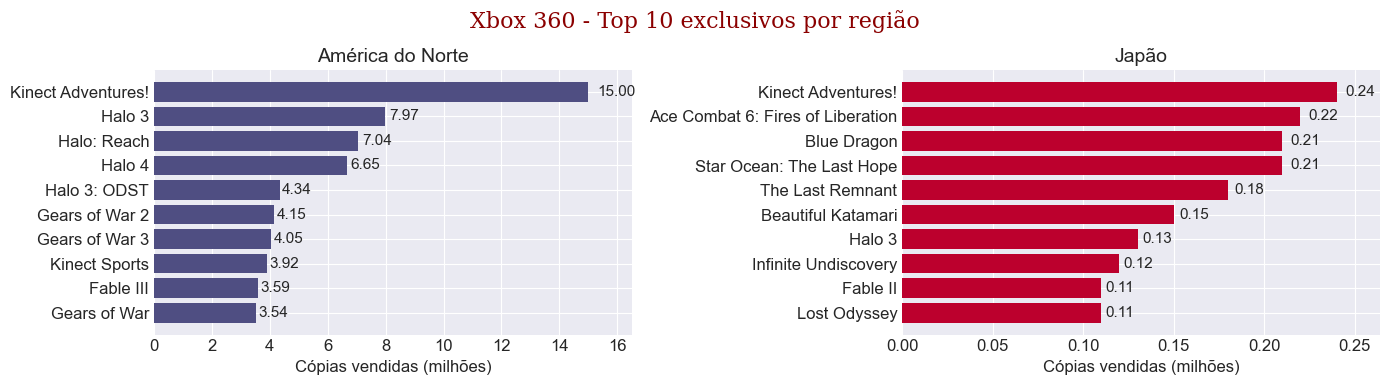

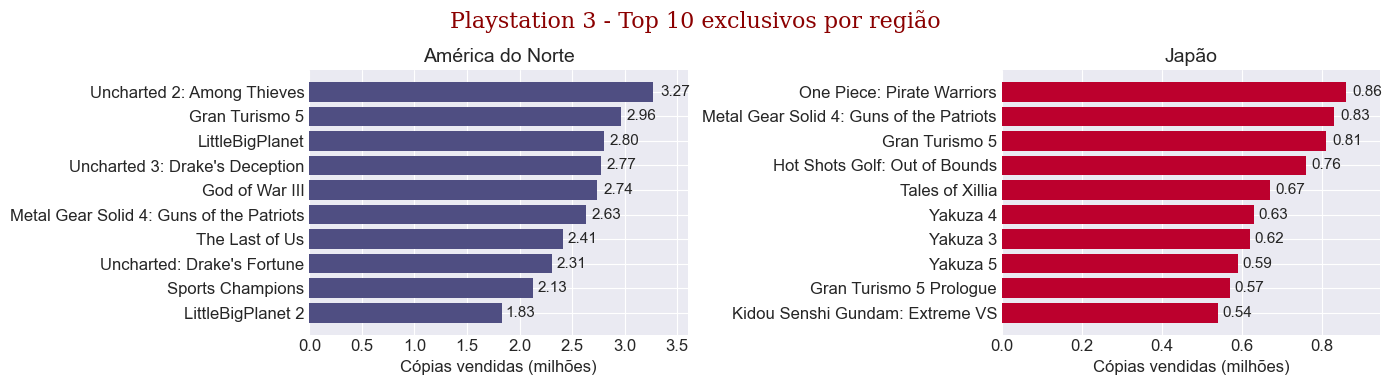

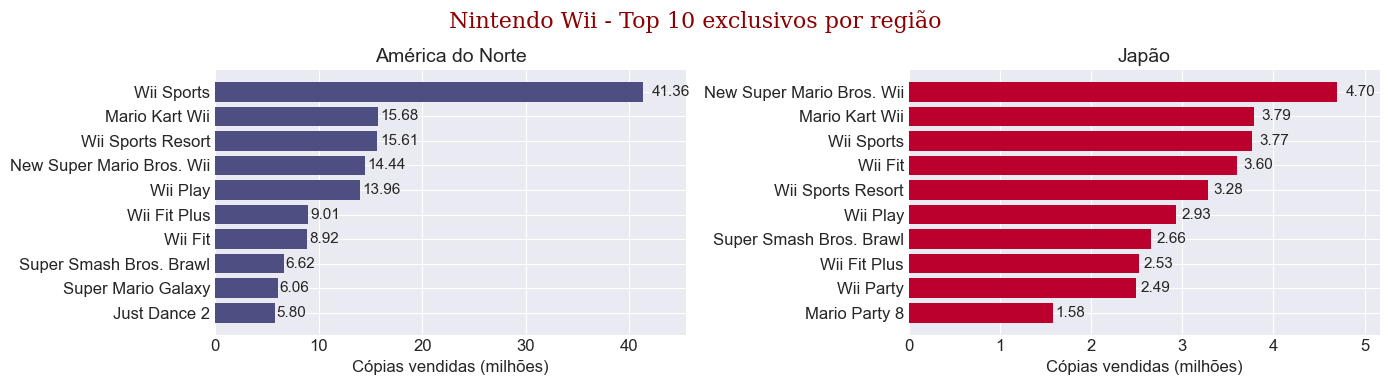

In [66]:
plot_top_exclusives_console_by_region(df_7th_gen, platforms, gen7, selected_regions)

In [67]:
filter_and_print_top_exclusives(df_7th_gen, gen7, selected_regions)


Xbox 360 - Top 10 títulos exclusivos mais vendidos em América do Norte:


,title,year_of_release,publisher,na_sales,genre,rating
1,Kinect Adventures!,2010,Microsoft Game Studios,15.00,Misc,E
2,Halo 3,2007,Microsoft Game Studios,7.97,Shooter,M
3,Halo: Reach,2010,Microsoft Game Studios,7.04,Shooter,M
4,Halo 4,2012,Microsoft Game Studios,6.65,Shooter,M
5,Halo 3: ODST,2009,Microsoft Game Studios,4.34,Shooter,M
6,Gears of War 2,2008,Microsoft Game Studios,4.15,Shooter,M
7,Gears of War 3,2011,Microsoft Game Studios,4.05,Shooter,M
8,Kinect Sports,2010,Microsoft Game Studios,3.92,Sports,E10+
9,Fable III,2010,Microsoft Game Studios,3.59,Role-Playing,M
10,Gears of War,2006,Microsoft Game Studios,3.54,Shooter,M



Xbox 360 - Top 10 títulos exclusivos mais vendidos em Japão:


,title,year_of_release,publisher,jp_sales,genre,rating
1,Kinect Adventures!,2010,Microsoft Game Studios,0.24,Misc,E
2,Ace Combat 6: Fires of Liberation,2007,Atari,0.22,Simulation,T
3,Blue Dragon,2006,Microsoft Game Studios,0.21,Role-Playing,T
4,Star Ocean: The Last Hope,2009,Square Enix,0.21,Role-Playing,T
5,The Last Remnant,2008,Square Enix,0.18,Role-Playing,M
6,Beautiful Katamari,2007,Namco Bandai Games,0.15,Puzzle,E
7,Halo 3,2007,Microsoft Game Studios,0.13,Shooter,M
8,Infinite Undiscovery,2008,Square Enix,0.12,Role-Playing,T
9,Fable II,2008,Microsoft Game Studios,0.11,Role-Playing,M
10,Lost Odyssey,2007,Microsoft Game Studios,0.11,Role-Playing,T



Playstation 3 - Top 10 títulos exclusivos mais vendidos em América do Norte:


,title,year_of_release,publisher,na_sales,genre,rating
1,Uncharted 2: Among Thieves,2009,Sony Computer Entertainment,3.27,Action,T
2,Gran Turismo 5,2010,Sony Computer Entertainment,2.96,Racing,E
3,LittleBigPlanet,2008,Sony Computer Entertainment,2.80,Platform,E
4,Uncharted 3: Drake's Deception,2011,Sony Computer Entertainment,2.77,Action,T
5,God of War III,2010,Sony Computer Entertainment,2.74,Action,M
6,Metal Gear Solid 4: Guns of the Patriots,2008,Konami Digital Entertainment,2.63,Action,M
7,The Last of Us,2013,Sony Computer Entertainment Europe,2.41,Action,M
8,Uncharted: Drake's Fortune,2007,Sony Computer Entertainment,2.31,Action,T
9,Sports Champions,2010,Sony Computer Entertainment,2.13,Sports,E10+
10,LittleBigPlanet 2,2011,Sony Computer Entertainment,1.83,Platform,E



Playstation 3 - Top 10 títulos exclusivos mais vendidos em Japão:


,title,year_of_release,publisher,jp_sales,genre,rating
1,One Piece: Pirate Warriors,2012,Namco Bandai Games,0.86,Action,T
2,Metal Gear Solid 4: Guns of the Patriots,2008,Konami Digital Entertainment,0.83,Action,M
3,Gran Turismo 5,2010,Sony Computer Entertainment,0.81,Racing,E
4,Hot Shots Golf: Out of Bounds,2007,Sony Computer Entertainment,0.76,Sports,E
5,Tales of Xillia,2011,Namco Bandai Games,0.67,Role-Playing,T
6,Yakuza 4,2010,Sega,0.63,Action,M
7,Yakuza 3,2009,Sega,0.62,Action,M
8,Yakuza 5,2012,Sega,0.59,Action,M
9,Gran Turismo 5 Prologue,2007,Sony Computer Entertainment,0.57,Racing,E
10,Kidou Senshi Gundam: Extreme VS,2011,Namco Bandai Games,0.54,Fighting,Not Rated



Nintendo Wii - Top 10 títulos exclusivos mais vendidos em América do Norte:


,title,year_of_release,publisher,na_sales,genre,rating
1,Wii Sports,2006,Nintendo,41.36,Sports,E
2,Mario Kart Wii,2008,Nintendo,15.68,Racing,E
3,Wii Sports Resort,2009,Nintendo,15.61,Sports,E
4,New Super Mario Bros. Wii,2009,Nintendo,14.44,Platform,E
5,Wii Play,2006,Nintendo,13.96,Misc,E
6,Wii Fit Plus,2009,Nintendo,9.01,Sports,E
7,Wii Fit,2007,Nintendo,8.92,Sports,E
8,Super Smash Bros. Brawl,2008,Nintendo,6.62,Fighting,T
9,Super Mario Galaxy,2007,Nintendo,6.06,Platform,E
10,Just Dance 2,2010,Ubisoft,5.80,Misc,E10+



Nintendo Wii - Top 10 títulos exclusivos mais vendidos em Japão:


,title,year_of_release,publisher,jp_sales,genre,rating
1,New Super Mario Bros. Wii,2009,Nintendo,4.70,Platform,E
2,Mario Kart Wii,2008,Nintendo,3.79,Racing,E
3,Wii Sports,2006,Nintendo,3.77,Sports,E
4,Wii Fit,2007,Nintendo,3.60,Sports,E
5,Wii Sports Resort,2009,Nintendo,3.28,Sports,E
6,Wii Play,2006,Nintendo,2.93,Misc,E
7,Super Smash Bros. Brawl,2008,Nintendo,2.66,Fighting,T
8,Wii Fit Plus,2009,Nintendo,2.53,Sports,E
9,Wii Party,2010,Nintendo,2.49,Misc,E
10,Mario Party 8,2007,Nintendo,1.58,Misc,E


### 2.3.6 Preferência de gêneros por região

### Quantidade de títulos por gênero em cada plataforma

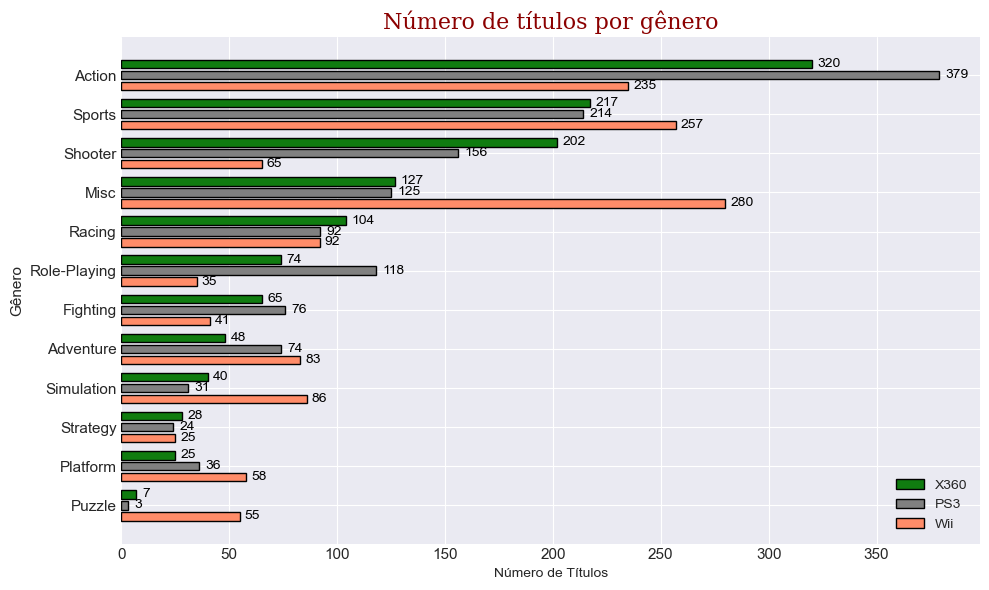

In [68]:
plot_titles_by_genre(df_7th_gen, gen7)

### Gêneros mais vendidos por região

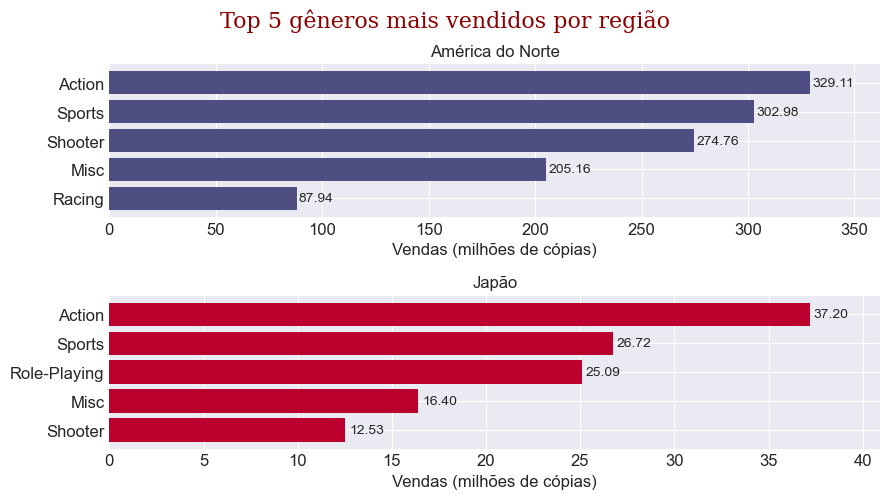

In [69]:
plot_top_genres_by_region(df_7th_gen, selected_regions, region_info)

### Gêneros mais vendidos por plataforma e região

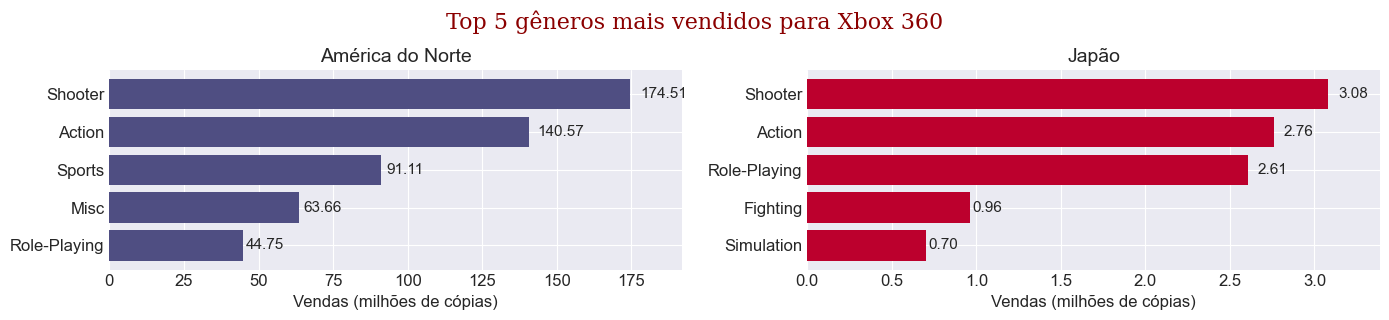

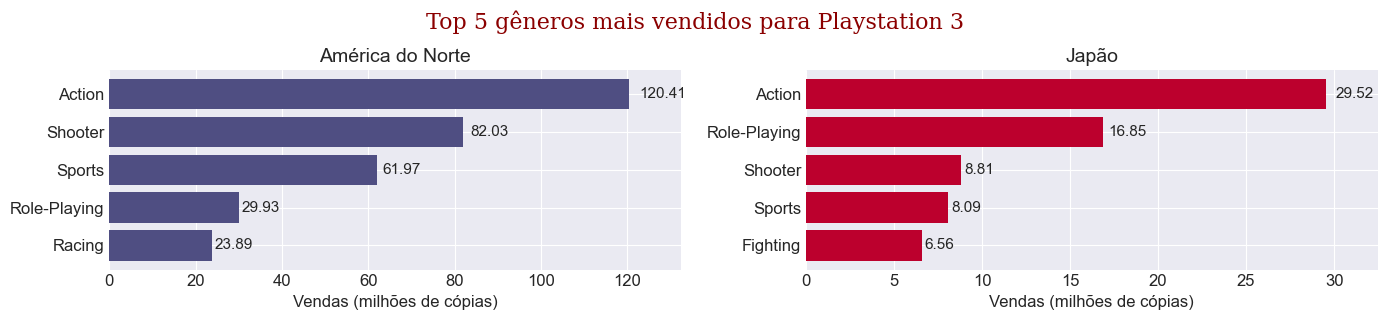

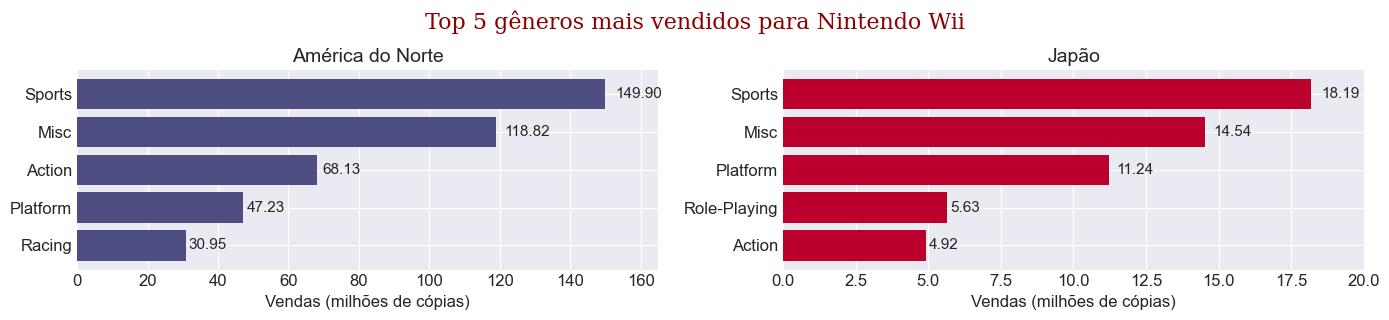

In [70]:
plot_top_genres_by_console_and_region(df_7th_gen, gen7, selected_regions)

### Qual foi a parcela de vendas de cada gênero nestes mercados?

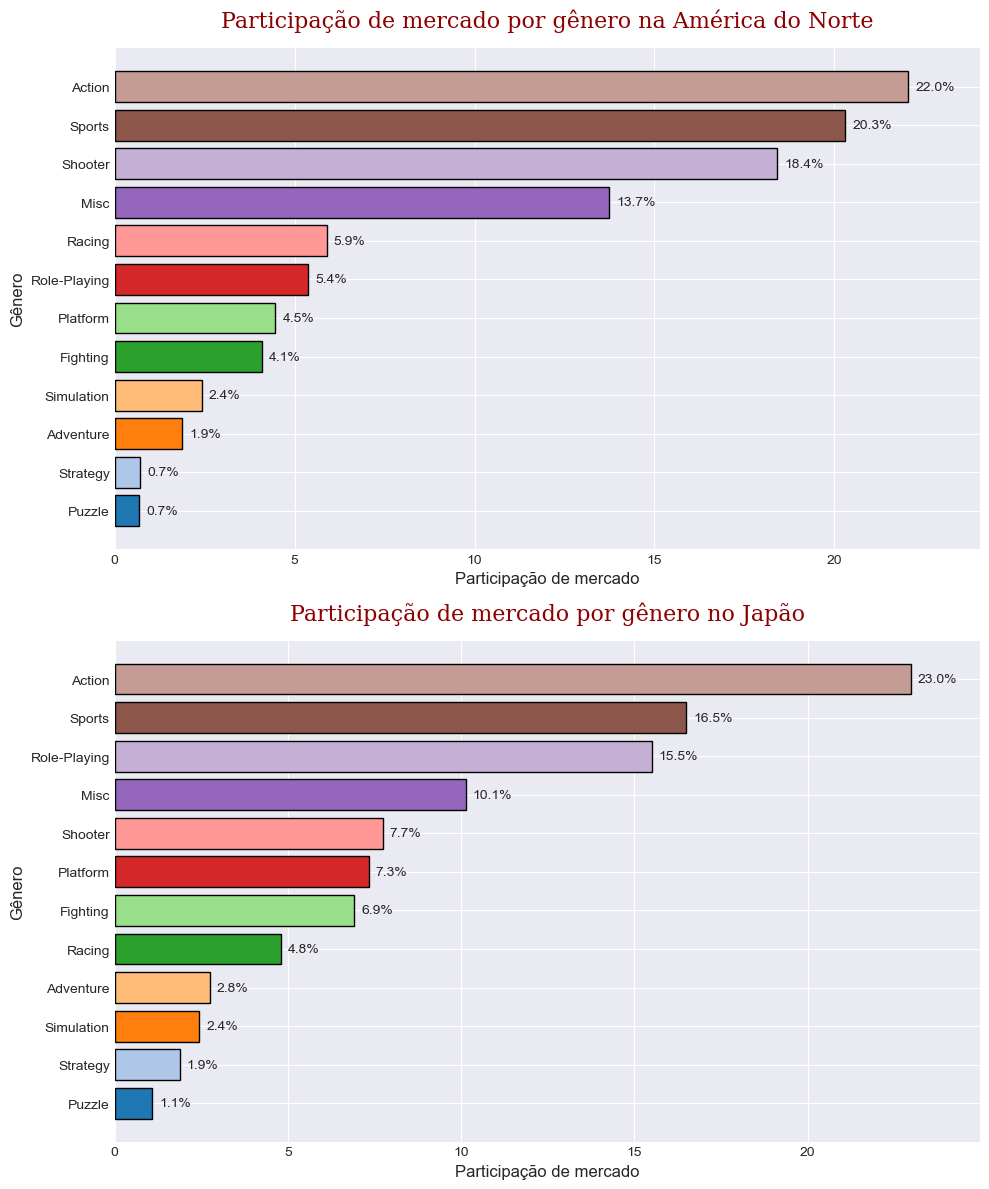

In [71]:
plot_market_share_by_genre(df_7th_gen, selected_regions, region_info)

### Títulos mais vendidos por gênero em cada região

### Action

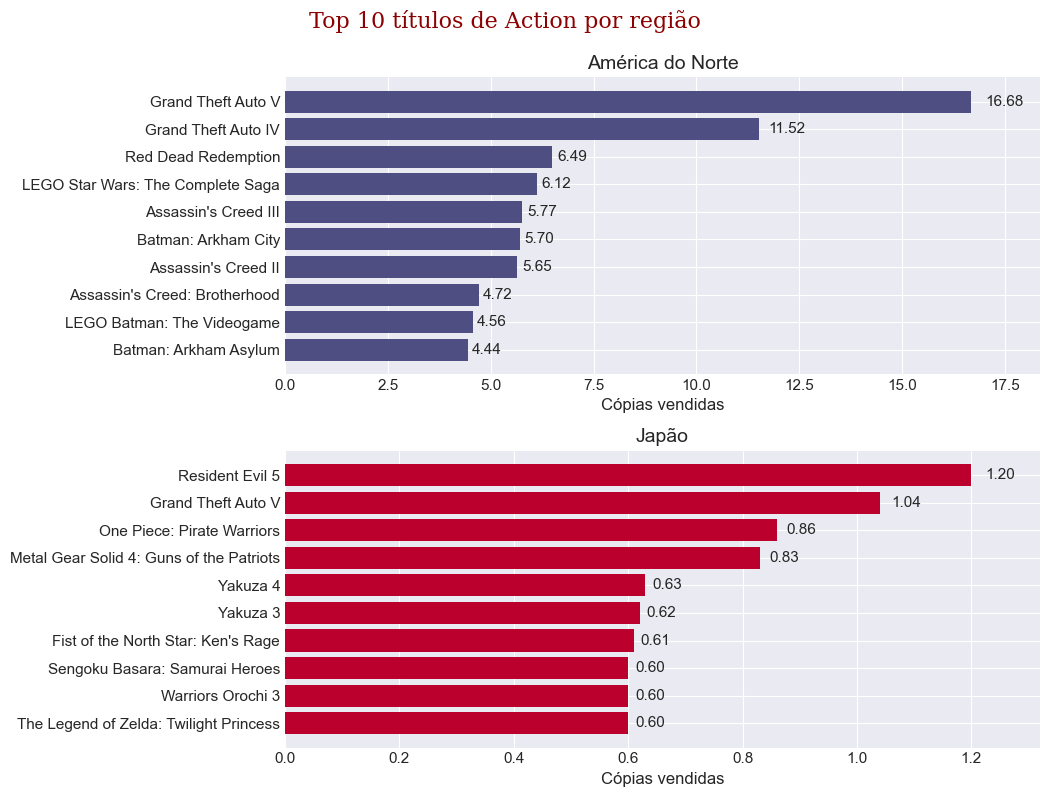

In [72]:
plot_top_titles_by_region(df_7th_gen, 'Action', region_info, selected_regions)

### Sports

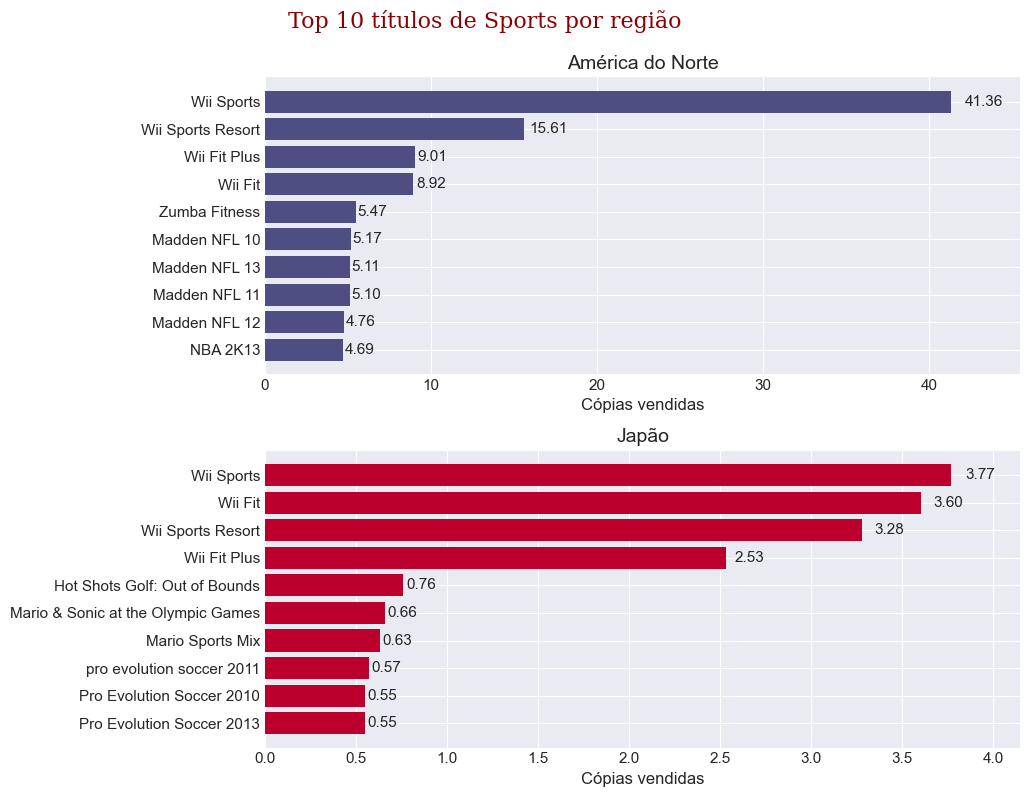

In [73]:
plot_top_titles_by_region(df_7th_gen, 'Sports', region_info, selected_regions)

### Fighting

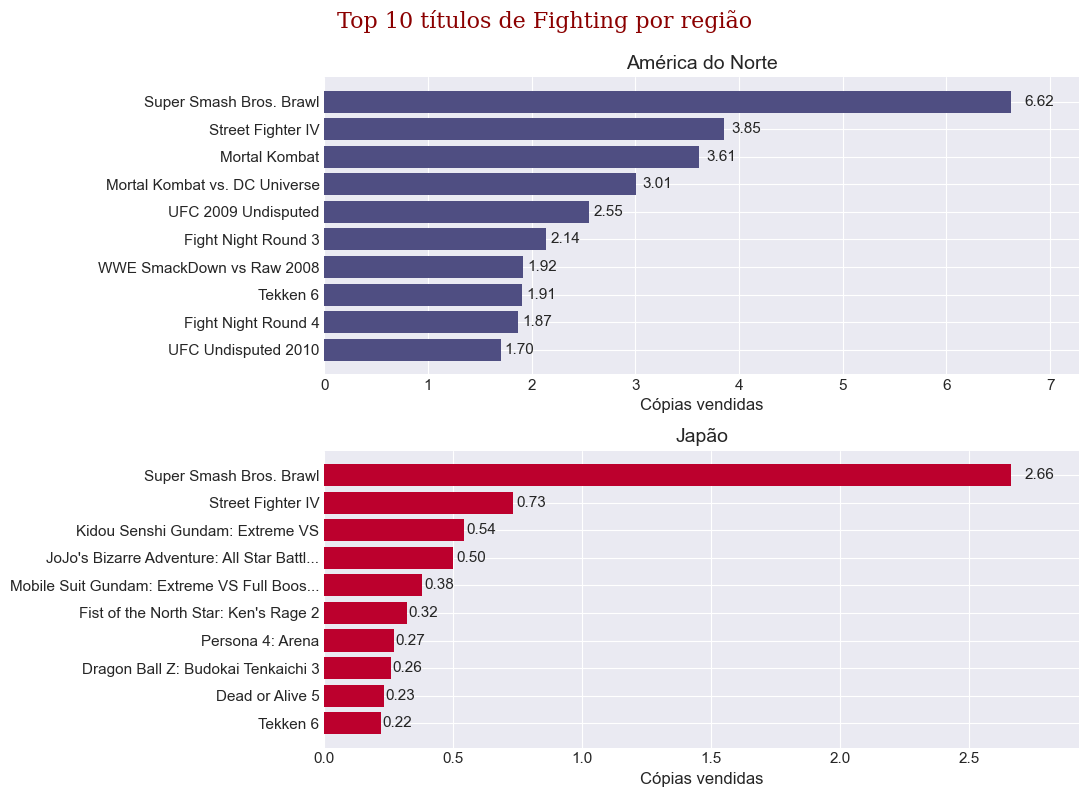

In [74]:
plot_top_titles_by_region(df_7th_gen, 'Fighting', region_info, selected_regions)

### RPG

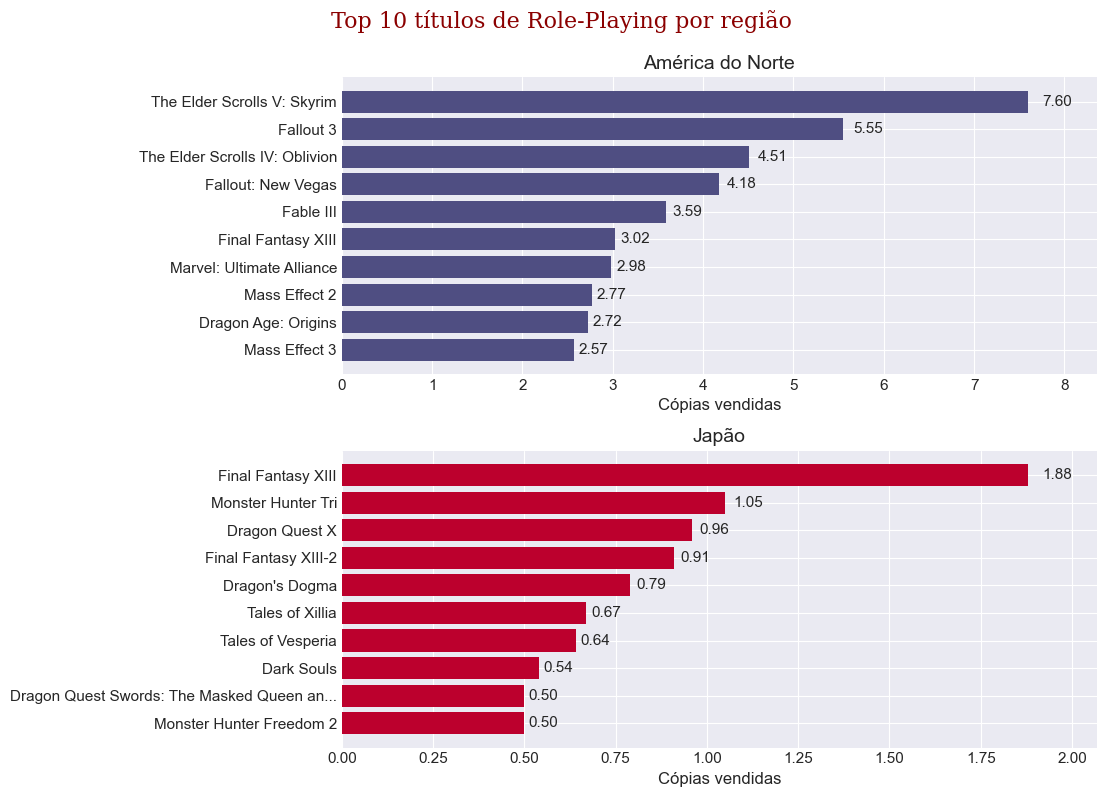

In [75]:
plot_top_titles_by_region(df_7th_gen, 'Role-Playing', region_info, selected_regions)

### 2.3.7 Preferência por publishers

### Vendas por publishers e região

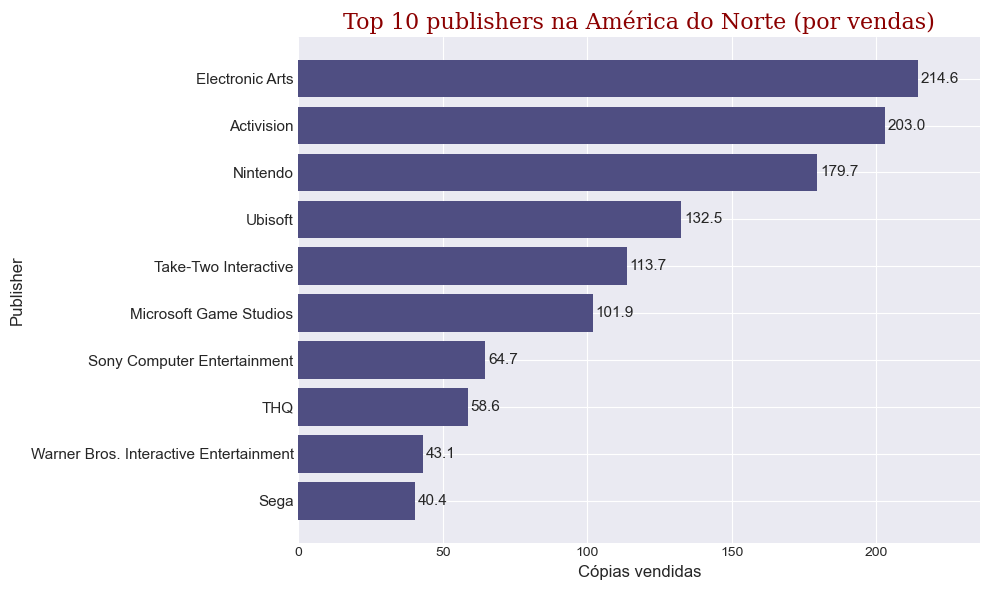

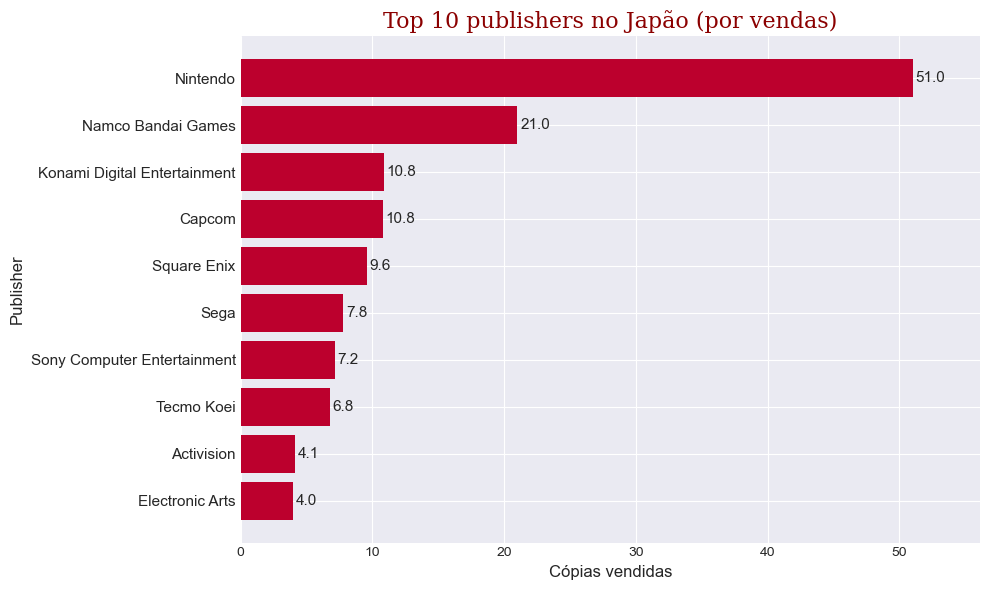

In [76]:
plot_top_publishers_by_region(df_7th_gen, selected_regions)

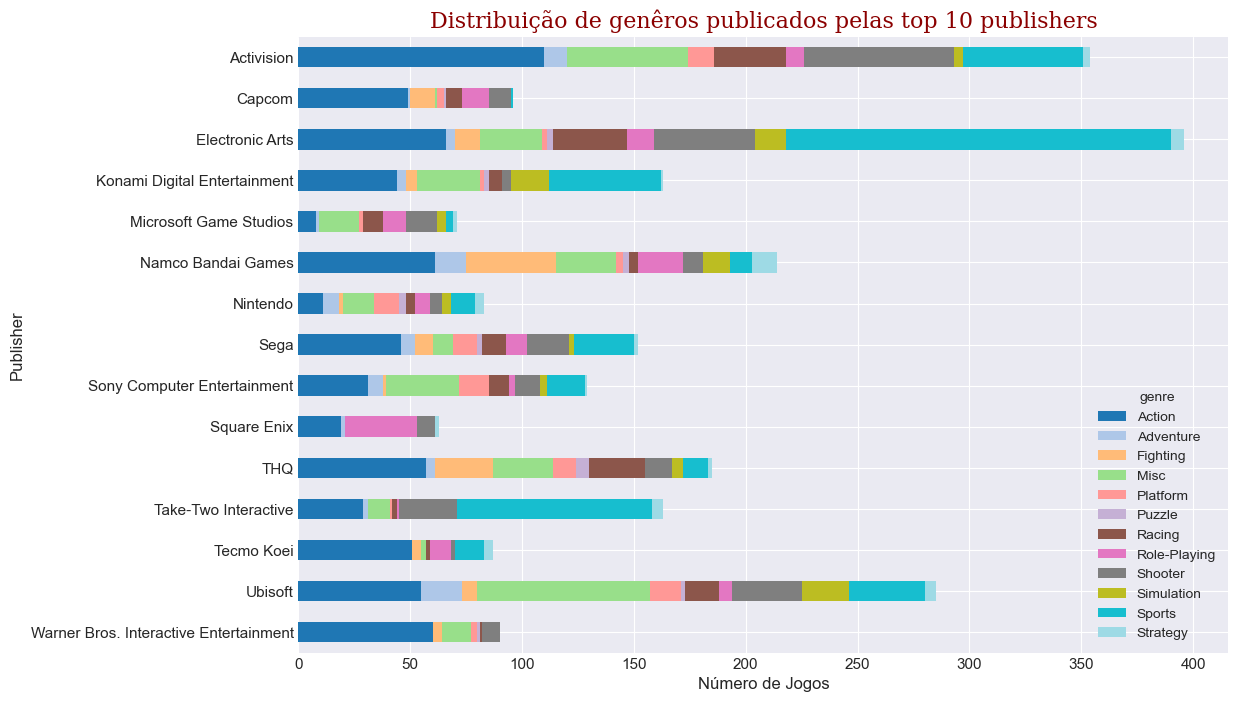

In [77]:
plot_genres_count_by_publishers_global(df_7th_gen)

### 2.3.8 Vendas por classificação etária

### Distribuição e vendas por classificação etária

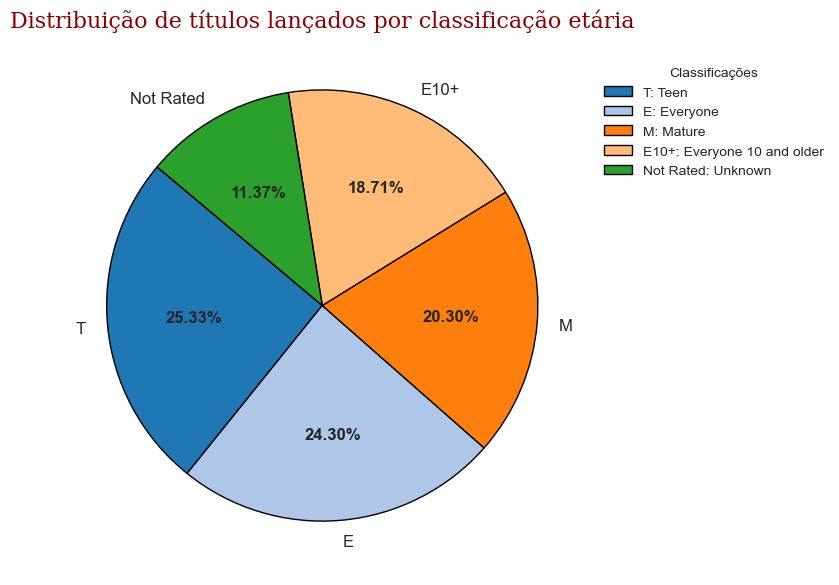

In [78]:
plot_rating_distribution(df_7th_gen)

### Distribuição e vendas por classificação etária e plataforma

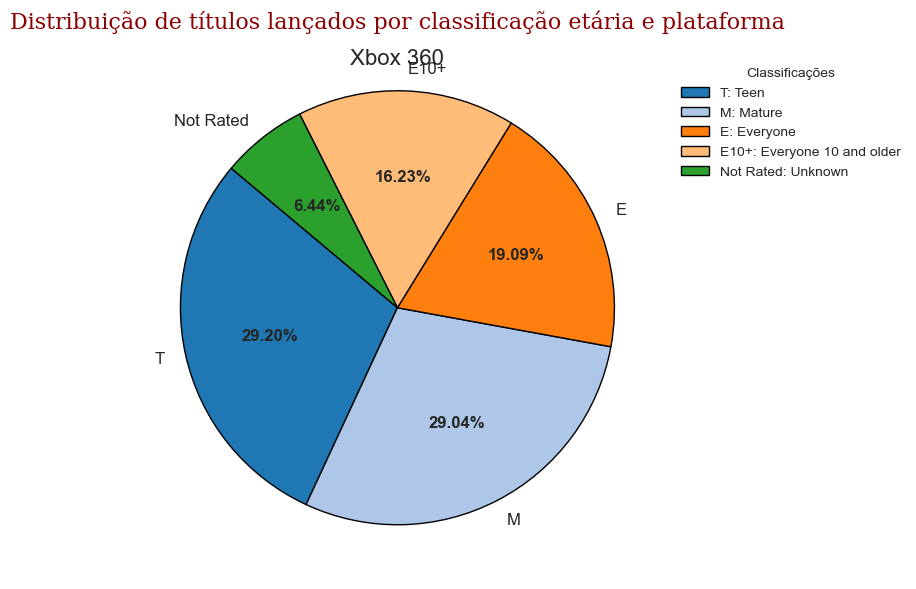

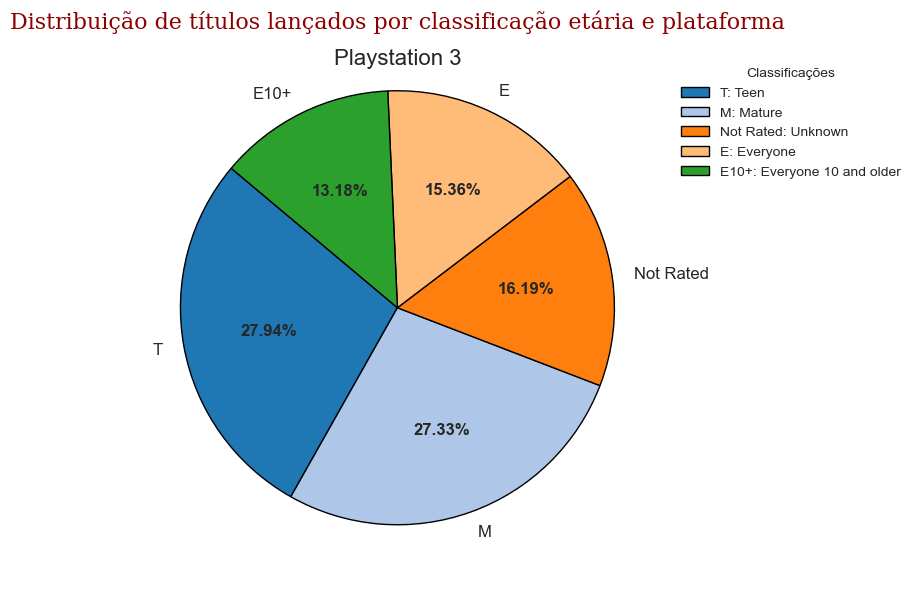

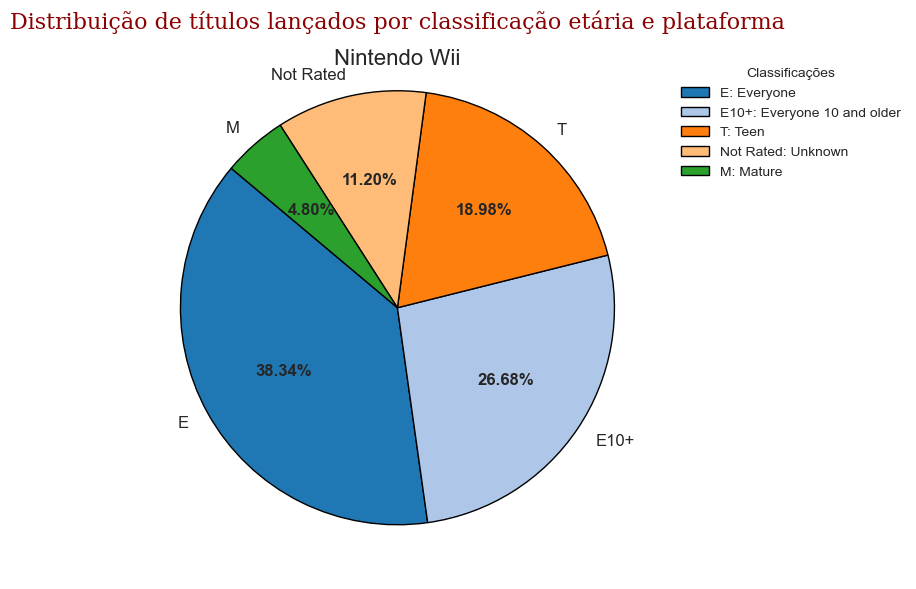

In [79]:
plot_rating_distribution_by_platform(df_7th_gen, gen7)

### Vendas por classificação etária e região

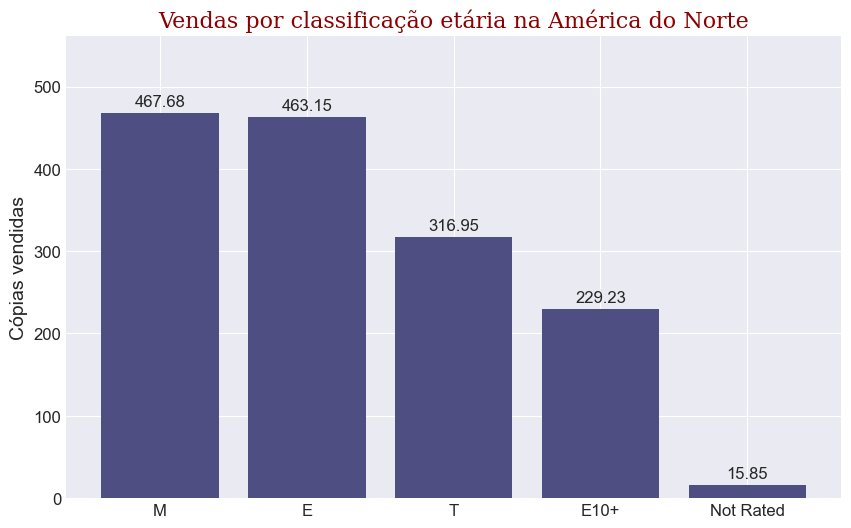

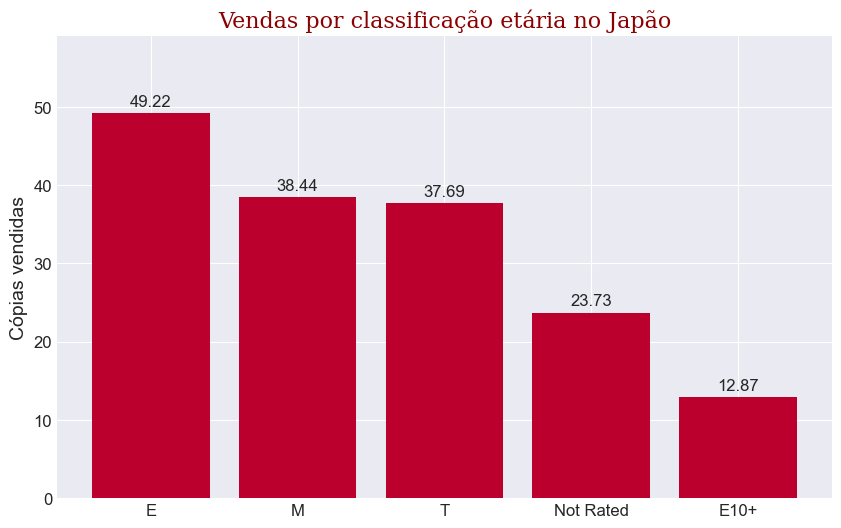

In [80]:
plot_sales_by_rating_per_region(df_7th_gen, selected_regions)

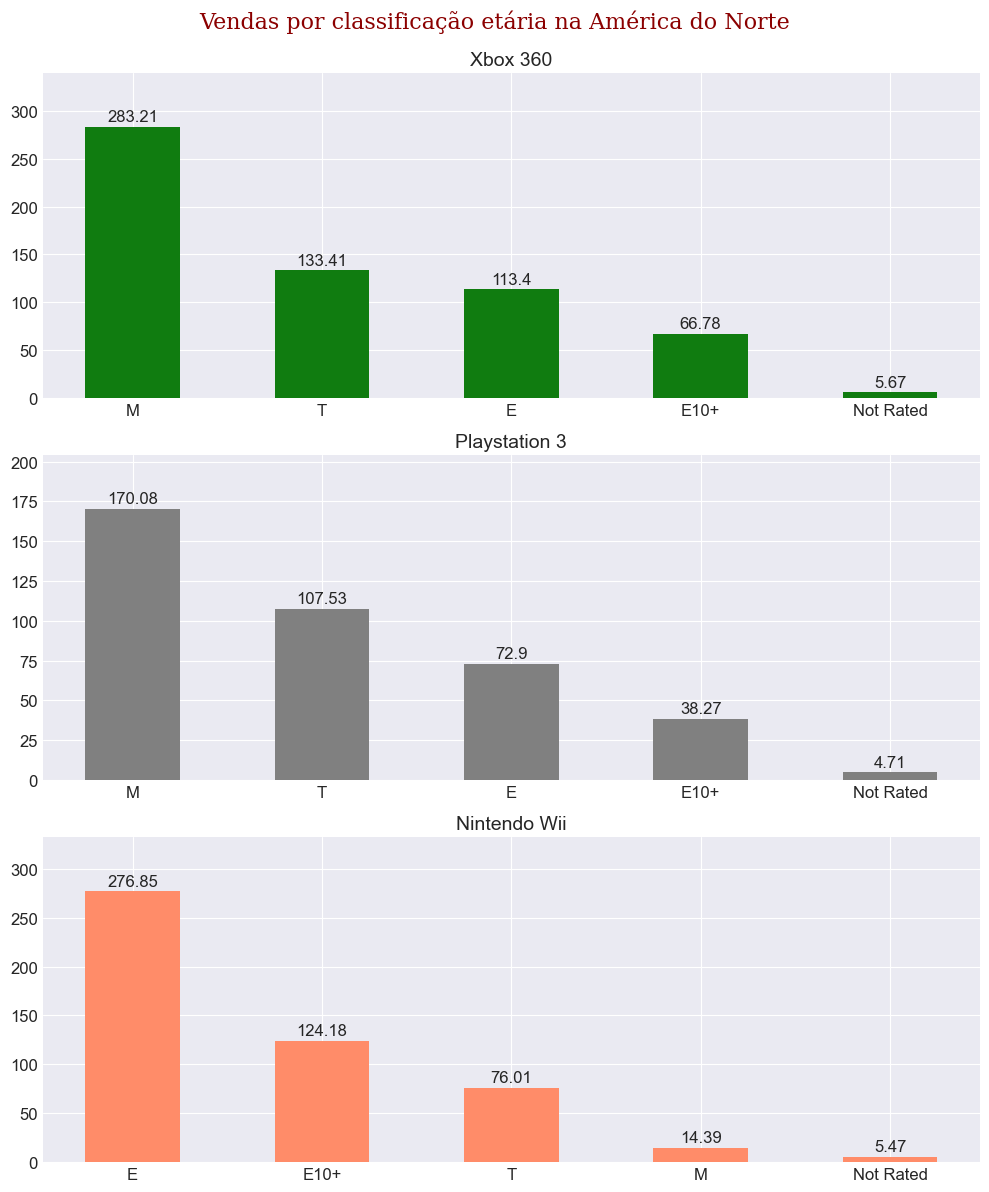

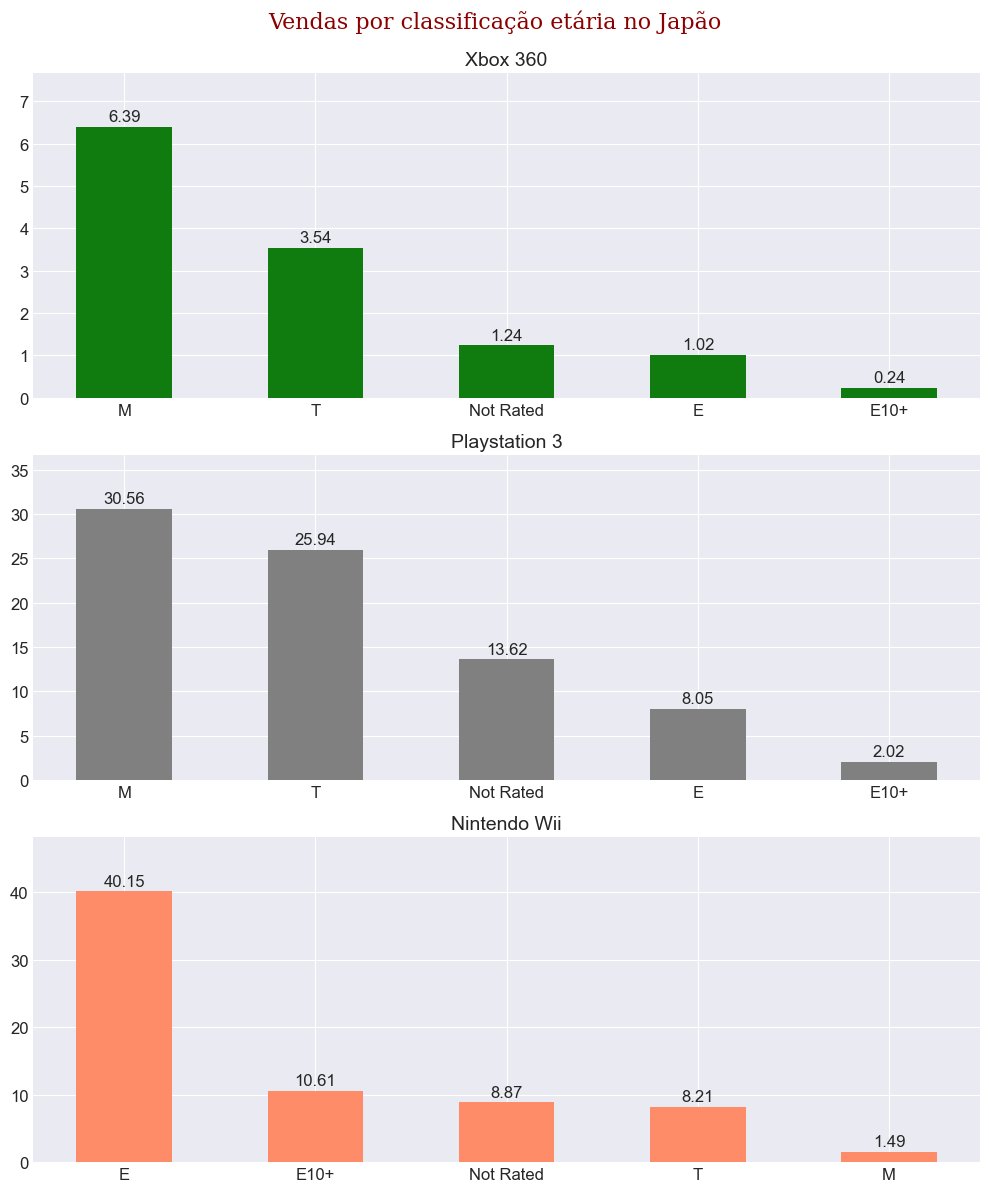

In [81]:
plot_sales_by_rating_per_platform(df_7th_gen, gen7, selected_regions)

## Créditos e Contato

**Desenvolvido por:**  
Bruno Casini

**GitHub:**  
[<img src="https://img.icons8.com/ios-filled/20/000000/github.png"/> GitHub](https://github.com/kzini)  
`https://github.com/kzini`

**LinkedIn:**  
[<img src="https://img.icons8.com/ios-filled/20/000000/linkedin.png"/> LinkedIn](https://www.linkedin.com/in/kzini)  
`https://www.linkedin.com/in/kzini`